# IBM HR Analytics Challenge
## Anuprava Chatterjee

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the investment of the "sharks"?






### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:




2) Math Solution:






3) Implementation of the Solution


In [3]:
# your code here




### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [4]:
# your code here






### Models


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.patches as patches
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, linear_model, feature_selection, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import *
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import seaborn as sns
print("Imported!")

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Imported!


### Problem Statement

In [6]:
data = pd.read_csv("attrition.csv")
data.shape

(1470, 35)

In [7]:
data.isnull().sum(axis=0) # Nice! No missing value.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.head() # Not all predictors are numeric. 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Drop the target column, Attrition from the dataset
df = data.drop(['Attrition',
                'EmployeeCount','StandardHours',
                'EducationField','JobRole','Over18'], axis=1)

# create a list of categorical predictors
categorical_index = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical_index.append(col)
categorical_index = np.asarray(categorical_index)

# Store the numerical columns in a list numerical
numerical_index = df.columns.difference(categorical_index).tolist()
numerical_index = np.asarray(numerical_index)

In [10]:
# construct a subset of data consisting of only numerical features
df_num = data[numerical_index]
df_cat = data[categorical_index]
df_num.shape

(1470, 24)

In [11]:
print("BusinessTravel:",data.BusinessTravel.unique())
print("Department:",data.Department.unique())
print("EducationField:",data.EducationField.unique())
print("JobRole:",data.JobRole.unique())
print("\nDrop EducationField and JobRole. Also Over18 is homogeneous. ")

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Drop EducationField and JobRole. Also Over18 is homogeneous. 


In [12]:
dummies = pd.DataFrame(df[['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime']])
dummies = pd.get_dummies(dummies)
df_dummy = pd.concat([df, dummies], axis=1)
df_dummy = df_dummy.drop(['BusinessTravel', 'Department', 'Gender',
                          'MaritalStatus','OverTime', 'BusinessTravel_Non-Travel',
                          'Department_Human Resources','Gender_Female',
                          'MaritalStatus_Divorced','OverTime_No'], axis=1)
print("df shape:",df.shape)
print("df_dummy shape:",df_dummy.shape)

df shape: (1470, 29)
df_dummy shape: (1470, 32)


In [13]:
data['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [14]:
data['Target'] = [1 if y=='Yes' else 0 for y in data[['Attrition']].values]

In [15]:
# Split into training and testing data
train, test, target_train, target_test = train_test_split(df, data['Target'], 
                                                         train_size= 0.8,random_state=0)
print("shape train:",train.shape)
print("shape test:",test.shape)

shape train: (1176, 29)
shape test: (294, 29)


/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
# Split into training and testing data for data with dummy variables
train_dummy, test_dummy, target_train_dummy, target_test_dummy = train_test_split(
    df_dummy, data['Target'], train_size= 0.8,random_state=0)
print("shape train_dummy:",train_dummy.shape)
print("shape test_dummy:",test_dummy.shape)

shape train_dummy: (1176, 32)
shape test_dummy: (294, 32)


/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Parallel Coordinate Plot

In [17]:
# Iterate over the columns to apply z-score transformation
df_pc=df.loc[:,numerical_index]
cols = list(df_pc.columns)
for col in cols:
    col_zscore = col + '_zscore'
    df_pc[col] = (df_pc[col] - df_pc[col].mean())/df_pc[col].std(ddof=0)

In [18]:
df_pc.isnull().values.any()

False

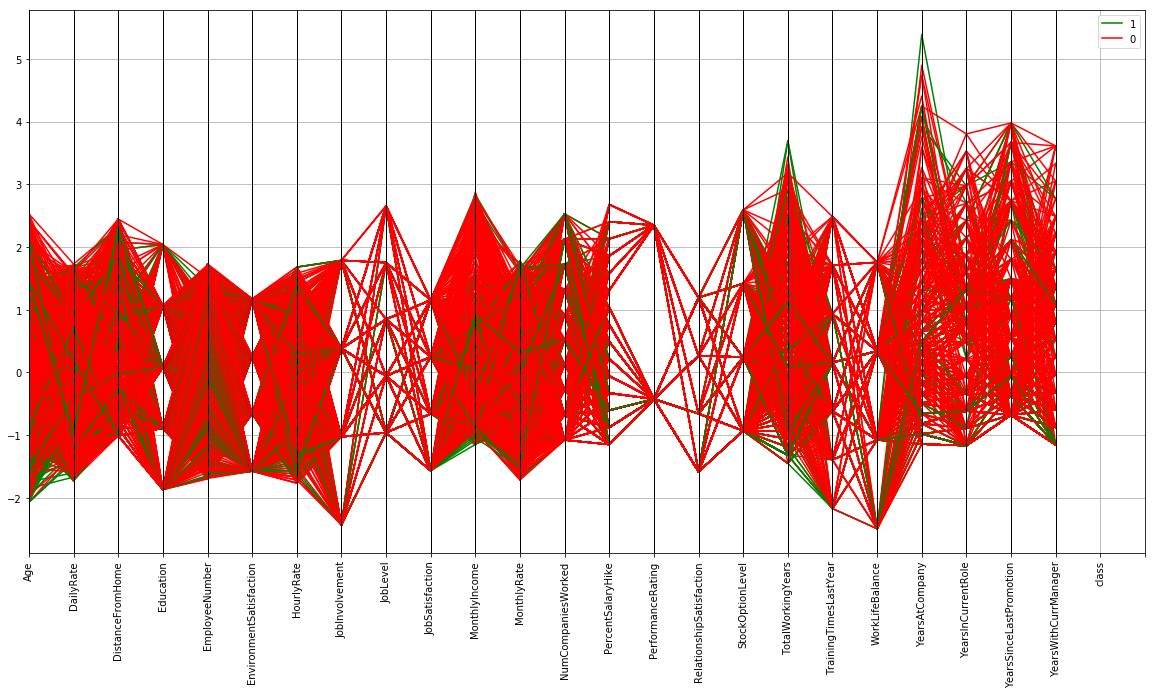

In [19]:
df_pc['class']=data.Target
plt.figure(figsize=(20,10))
parallel_coordinates(df_pc,'class',color=['g','r'])
plt.xticks(np.arange(26),df_pc.columns, rotation='vertical')
plt.show()

## Factor Analysis

### PCA

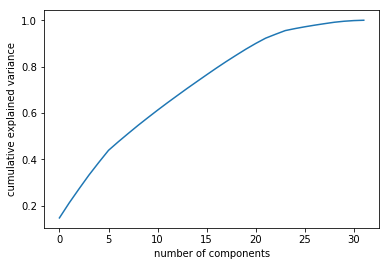

In [20]:
# How many components?
x_std = StandardScaler().fit_transform(df_dummy)
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [21]:
pipeline = Pipeline([('scaling', StandardScaler(with_mean=False)), ('pca', PCA(n_components=10))])
pipeline.fit_transform(df_num)

array([[-0.32573293, -1.61847544,  0.16103456, ...,  1.24287488,
         0.2517266 , -2.72381591],
       [ 0.62391491,  2.58088099,  1.94750924, ..., -0.6427761 ,
         1.31078501,  0.12246418],
       [-2.40606138, -1.10696342,  0.49666757, ..., -0.6782802 ,
        -0.16543274, -1.5816487 ],
       ..., 
       [-1.25296106,  1.77051103,  1.71944177, ...,  0.56483891,
        -1.21415706, -0.87841322],
       [ 0.9783137 , -0.504752  , -0.46720739, ..., -0.58498168,
        -0.37030594, -1.28157392],
       [-1.2069684 , -0.51874099, -0.82331887, ...,  0.36913291,
        -0.44447969,  0.40378086]])

In [22]:
pipeline.named_steps['pca'].explained_variance_ratio_

array([ 0.19399738,  0.0765091 ,  0.07315089,  0.050471  ,  0.04750199,
        0.04505456,  0.04403519,  0.04347839,  0.04264912,  0.04128755])

#### Create Biplot

In [23]:
X = df_dummy
y = data.Target
# Scale data
scaler = StandardScaler().fit(X)
X = scaler.transform(X) 
pca = PCA()
x_new = pca.fit_transform(X)

In [24]:
# Plot biplot 
# Source: https://stackoverflow.com/questions/39216897/how-to-plot-pca-loadings-and-loading-label-like-rs-autoplot-w-matplotli
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    colors = ['orange','skyblue']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = [colors[c] for c in y])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.1, coeff[i,1]*1.1, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center', size=12)
        else:
            plt.text(coeff[i,0]*1.1, coeff[i,1]*1.1, labels[i], color = 'b', ha = 'center', va = 'center', size=12)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

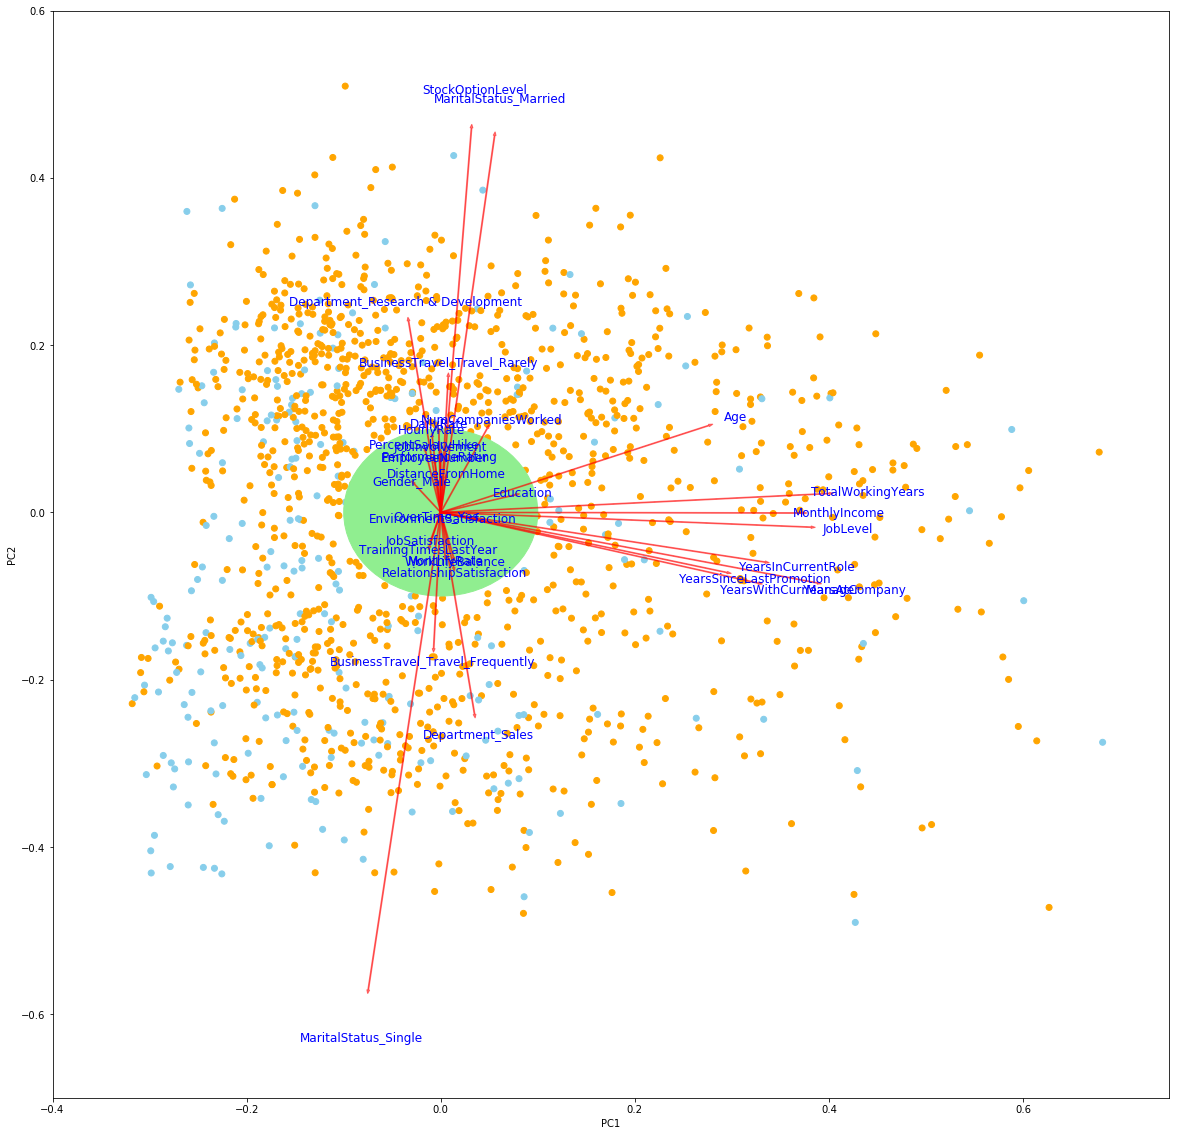

In [25]:
# Use only the 2 PCs.
fig_biplot = plt.figure(figsize=(20,20))
ax_biplot = fig_biplot.add_subplot(111)
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),labels=df_dummy.columns)
plt.xlim(-.4,.75)
plt.ylim(-.7,.6)
ax_biplot.add_patch(
    patches.Circle((0, 0),0.1,color='lightgreen')
)
plt.savefig('PCA_Attrition.png')
plt.show()

The arrow length represents the variance of each variable contributing to the principal conponents. and the angle between arrows represents the corration between variables.

The biplot shows that some variables are in the same direction having similar meaning in the context of the data (similar response).

### Factor Analysis

In [26]:
factor = FactorAnalysis(random_state=0).fit(X)

In [27]:
pd.DataFrame(factor.components_,columns=df_dummy.columns)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.558602,-0.003960,0.007843,0.136117,-0.013786,0.002166,-0.018118,-0.004246,0.806473,-0.015485,...,0.580506,0.663631,-0.012917,0.015128,-0.062131,0.065283,-0.048797,0.091606,-0.130150,-0.006735
1,-0.054798,-0.027192,-0.005495,0.010793,0.024225,-0.022938,-0.028422,-0.037964,0.108901,0.012731,...,-0.042485,-0.070582,-0.000414,0.000488,-0.795449,0.796420,-0.028134,-0.103543,0.170298,0.007475
2,0.369499,0.057794,-0.022537,0.096476,0.006045,0.001780,0.044647,0.022116,0.294364,-0.019796,...,-0.305802,-0.435785,-0.212881,0.227300,0.058456,-0.074296,-0.002339,0.116989,-0.164299,0.036586
3,0.049434,-0.069650,-0.054594,0.025766,-0.079441,0.021373,-0.055949,-0.043559,0.081125,0.015704,...,-0.035465,-0.050856,0.122731,-0.114893,0.175532,-0.163748,-0.025865,-0.579970,0.728591,0.014277
4,0.066179,0.016694,0.042723,0.000651,-0.019349,-0.047091,-0.014505,-0.039069,0.053166,0.027395,...,-0.043699,-0.065122,0.170950,-0.185872,-0.094746,0.099650,-0.017150,-0.005793,0.021928,0.013199
5,0.064794,0.014930,0.010849,0.018488,0.016566,-0.003371,-0.008744,0.006782,0.048450,0.032899,...,-0.028187,-0.076677,0.688451,-0.683399,0.012716,-0.016871,0.003504,0.078883,-0.150346,0.032040
6,0.228673,0.015251,0.029049,0.274940,0.041002,-0.012044,0.102554,0.104969,-0.152972,-0.094270,...,0.045462,0.057132,0.001790,-0.004453,-0.042867,0.036800,-0.049113,-0.032677,0.024864,-0.012278
7,-0.028586,-0.124117,-0.010883,0.085431,0.204944,-0.141125,0.099256,-0.020932,0.020286,-0.123544,...,-0.028132,0.009298,0.005944,-0.012155,0.008700,-0.013546,0.024070,-0.011907,0.017066,-0.259737
8,0.007315,-0.153591,0.067869,0.001904,0.161422,0.176416,-0.053772,-0.131650,-0.007588,-0.060414,...,0.040683,-0.018553,-0.005644,0.000037,0.002668,-0.005293,-0.082033,-0.016744,0.000957,0.120411
9,-0.017601,-0.035201,0.178886,0.009043,0.072206,-0.080514,0.154515,0.085866,0.013492,-0.069247,...,-0.019600,0.004857,0.007560,0.002057,0.000094,-0.003043,0.035264,0.061115,0.011907,0.095553


In [28]:
factor = FactorAnalysis(n_components=17,random_state=0).fit(X)
pd.DataFrame(factor.components_,columns=df_dummy.columns)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.560608,0.002426,-0.000318,0.117942,-0.014884,-0.002308,-0.020531,-0.012142,0.960381,-0.008592,...,0.449634,0.495413,-0.024618,0.029307,-0.116048,0.118130,-0.042539,0.074552,-0.113634,0.001254
1,-0.106920,-0.012059,0.010121,-0.001176,0.031083,-0.027046,-0.015809,-0.025893,0.005597,0.010932,...,-0.038913,-0.056364,0.002125,-0.007158,-0.944980,0.946244,-0.019667,-0.010954,0.058247,0.004080
2,0.015400,-0.017641,-0.045659,0.000598,-0.036947,0.006006,-0.019174,-0.027226,0.141547,0.013025,...,-0.370239,-0.524068,-0.051380,0.063705,0.039079,-0.032690,-0.005021,-0.420549,0.565559,0.022212
3,-0.091748,-0.082236,-0.014506,0.006079,-0.045983,0.010278,-0.050304,-0.038082,-0.078037,0.013683,...,0.286145,0.419191,0.166384,-0.169074,0.011271,0.009079,-0.031107,-0.525310,0.717618,-0.016899
4,0.023037,0.014881,0.037980,-0.015942,-0.018550,-0.037952,-0.010583,-0.029901,0.013327,0.019606,...,-0.029881,-0.042364,0.127284,-0.146275,-0.010204,0.017696,-0.008937,0.004745,0.011980,0.005093
5,-0.006042,0.003814,0.009440,-0.005168,0.007662,-0.006967,-0.019196,-0.004389,0.028272,0.034233,...,-0.028609,-0.075181,0.842972,-0.841356,0.005798,-0.005750,0.003010,0.018230,-0.081459,0.022518
6,0.574298,0.025347,0.004008,0.201550,0.003399,0.001871,0.049573,0.033544,-0.070867,-0.029109,...,-0.029008,-0.063164,0.022393,-0.003220,-0.032621,0.013227,-0.036881,-0.004635,0.012882,0.034805
7,-0.003175,0.003083,0.018285,0.032227,0.011199,0.026419,0.013937,-0.005085,0.009598,0.018308,...,-0.021320,0.016718,-0.038098,-0.010995,0.007030,0.010845,0.008141,-0.499852,0.009559,0.009549
8,-0.019268,-0.104363,-0.024968,-0.140779,0.019981,0.000484,-0.011900,-0.126848,-0.014890,0.077606,...,-0.013819,-0.124092,0.002546,0.009400,-0.020937,-0.016282,0.087817,-0.027512,-0.012341,0.127117
9,0.017672,0.184754,-0.009110,-0.113875,-0.274473,0.140158,-0.090240,0.008086,0.007595,0.190734,...,0.010881,-0.049091,-0.002592,0.001397,0.031383,0.031554,-0.031003,-0.012280,-0.010449,0.220691


### Lasso

In [29]:
# Grid search for tuning parameter alpha
# prepare a range of alpha values to test
alphas = [1/a for a in np.arange(1,1000)]
# create and fit a lasso regression model, testing each alpha
model = Lasso(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(df_dummy, data.Target)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 0.5, 0.33333333333333331, 0.25, 0.20000000000000001, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.10000000000000001, 0.090909090909090912, 0.083333333333333329, 0.076923076923076927, 0.071428571428571425, 0.066666666666666666, 0.0625, 0.0588235294...256281408, 0.001004016064257028, 0.0010030090270812437, 0.001002004008016032, 0.001001001001001001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [30]:
# summarize the results of the grid search
print("The best tuning parameter α is",grid.best_estimator_.alpha,"with the best_score_",grid.best_score_)

The best tuning parameter α is 0.0010582010582 with the best_score_ 0.191513189414


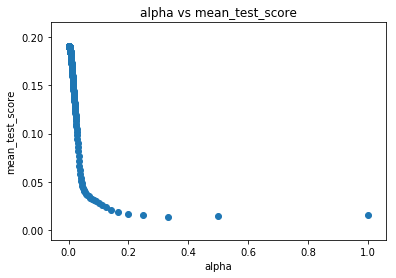

In [31]:
plt.scatter(alphas,grid.cv_results_['mean_test_score'])
plt.title("alpha vs mean_test_score")
plt.xlabel("alpha")
plt.ylabel("mean_test_score")
plt.show()

In [32]:
lasso = linear_model.Lasso(alpha=grid.best_estimator_.alpha,fit_intercept=True,normalize=True)
lasso.fit(df_dummy, data.Target)

Lasso(alpha=0.0010582010582010583, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
lasso_index=[]
print("intercept",lasso.intercept_)
for i in range(len(lasso.coef_)):
    if(lasso.coef_[i]!=0): 
        lasso_index.append(i)
        print(i,lasso.coef_[i])

intercept 0.200079479256
0 -0.000671592800847
5 -0.000953962111109
7 -0.00839263303603
8 -0.0076525316197
17 -0.000858500664368
21 -0.00169271724176
23 -0.000491034531132
30 0.0457167492438
31 0.111292812522


In [34]:
print("The number of predictors with nonzero coefficient",len(lasso.coef_[lasso.coef_!=0]))
df_dummy.columns[lasso_index]

The number of predictors with nonzero coefficient 9


Index(['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

### Randomforest for feature importance

In [35]:
rf = RandomForestClassifier(n_jobs=-1,random_state=0)
rf.fit(train_dummy, target_train_dummy)
rf_predictions = rf.predict(test_dummy)

from sklearn.metrics import accuracy_score
accuracy_score(target_test_dummy, rf_predictions)

0.86734693877551017

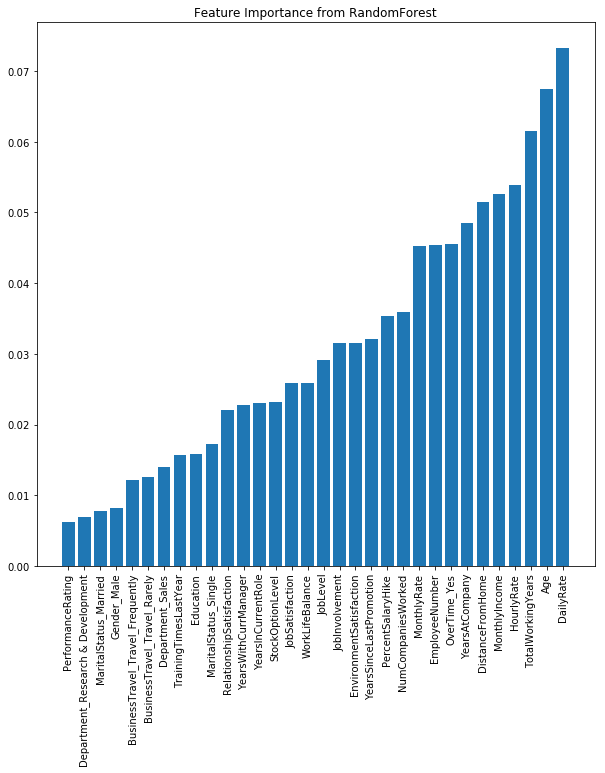

In [36]:
# Sorted plot
x = rf.feature_importances_
y = np.arange(len(rf.feature_importances_))

lists = sorted(zip(*[x, y]))
new_x, new_y = list(zip(*lists))

# Plot
plt.figure(figsize=(10,10))
plt.bar(np.arange(len(new_x)), new_x)
plt.xticks(np.arange(len(df_dummy.columns)), df_dummy.columns[[y for y in new_y]], rotation='vertical')
plt.title("Feature Importance from RandomForest")
plt.show()

## Predict Employee Attrition

#### Exploratory Data Analysis

In [37]:
# Functions for testing significance of predictors
# Source: https://www.kaggle.com/slamnz/ibm-employee-attrition-analysis-by-numerics

def get_p_value(s1,s2):
    
    from statsmodels.stats.weightstats import ztest
    from scipy.stats import ttest_ind
    
    if(len(s1) > 30 & len(s2) > 30):
        z, p = ztest(s1,s2)
        return p
    else:
        t, p = ttest_ind(s1,s2)
        return p
    
def get_p_values(data, category, numerics):
    
    output = {}
    
    for numeric in numerics:
        s1 = data[data[category] == data[category].unique()[0]][numeric]
        s2 = data[data[category] == data[category].unique()[1]][numeric]
        row = {"p-value" : get_p_value(s1,s2)}
        output[numeric] = row
    
    from pandas import DataFrame
    
    return DataFrame(data=output).T

def get_statistically_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] < 0.05].index)

def get_statistically_non_significant_numerics(data, category, numerics):
    df = get_p_values(data, category, numerics)
    return list(df[df["p-value"] >= 0.05].index)
    
def display_p_values(data, category, numerics):
    from IPython.display import display
    display(get_p_values(data, category, numerics).round(2).sort_values("p-value", ascending=False))

In [38]:
significant = get_statistically_significant_numerics(data,'Attrition',numerical_index) 
print("Significant features:\n",significant)
ns = get_statistically_non_significant_numerics(data,'Attrition',numerical_index)
print("Insignificant features:\n",ns)

Significant features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
Insignificant features:
 ['Education', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'YearsSinceLastPromotion']


#### Heatmap

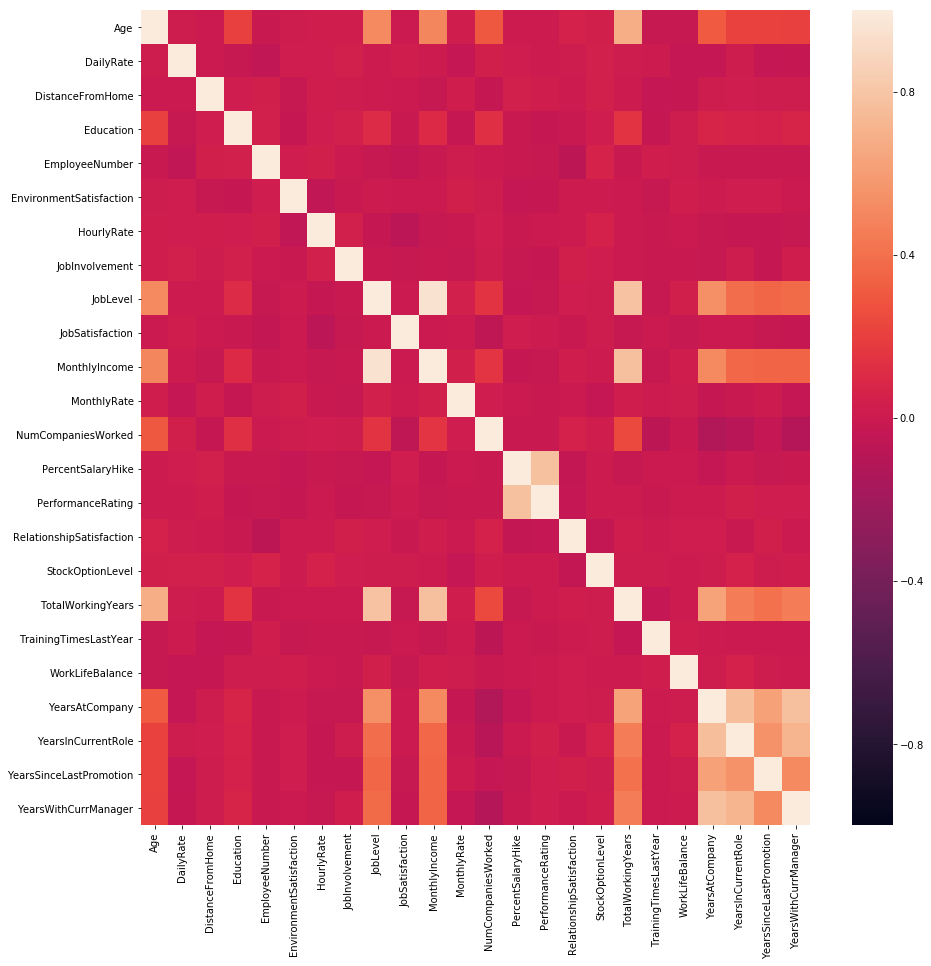

In [39]:
# calculate the correlation matrix
corr = data[numerical_index].corr()

# plot the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,vmin=-1, vmax=1)
plt.show()

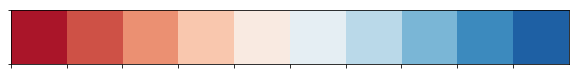

In [40]:
sns.palplot(sns.color_palette("RdBu", 10))
plt.show()

In [41]:
cmap = sns.palplot(sns.color_palette("RdBu", 10))

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,0.011,-0.0017,0.21,-0.01,0.01,0.024,0.03,0.51,-0.0049,0.5,0.028,0.3,0.0036,0.0019,0.054,0.038,0.68,-0.02,-0.021,0.31,0.21,0.22,0.2
DailyRate,0.011,1,-0.005,-0.017,-0.051,0.018,0.023,0.046,0.003,0.031,0.0077,-0.032,0.038,0.023,0.00047,0.0078,0.042,0.015,0.0025,-0.038,-0.034,0.0099,-0.033,-0.026
DistanceFromHome,-0.0017,-0.005,1,0.021,0.033,-0.016,0.031,0.0088,0.0053,-0.0037,-0.017,0.027,-0.029,0.04,0.027,0.0066,0.045,0.0046,-0.037,-0.027,0.0095,0.019,0.01,0.014
Education,0.21,-0.017,0.021,1,0.042,-0.027,0.017,0.042,0.1,-0.011,0.095,-0.026,0.13,-0.011,-0.025,-0.0091,0.018,0.15,-0.025,0.0098,0.069,0.06,0.054,0.069
EmployeeNumber,-0.01,-0.051,0.033,0.042,1,0.018,0.035,-0.0069,-0.019,-0.046,-0.015,0.013,-0.0013,-0.013,-0.02,-0.07,0.062,-0.014,0.024,0.01,-0.011,-0.0084,-0.009,-0.0092
EnvironmentSatisfaction,0.01,0.018,-0.016,-0.027,0.018,1,-0.05,-0.0083,0.0012,-0.0068,-0.0063,0.038,0.013,-0.032,-0.03,0.0077,0.0034,-0.0027,-0.019,0.028,0.0015,0.018,0.016,-0.005
HourlyRate,0.024,0.023,0.031,0.017,0.035,-0.05,1,0.043,-0.028,-0.071,-0.016,-0.015,0.022,-0.0091,-0.0022,0.0013,0.05,-0.0023,-0.0085,-0.0046,-0.02,-0.024,-0.027,-0.02
JobInvolvement,0.03,0.046,0.0088,0.042,-0.0069,-0.0083,0.043,1,-0.013,-0.021,-0.015,-0.016,0.015,-0.017,-0.029,0.034,0.022,-0.0055,-0.015,-0.015,-0.021,0.0087,-0.024,0.026
JobLevel,0.51,0.003,0.0053,0.1,-0.019,0.0012,-0.028,-0.013,1,-0.0019,0.95,0.04,0.14,-0.035,-0.021,0.022,0.014,0.78,-0.018,0.038,0.53,0.39,0.35,0.38
JobSatisfaction,-0.0049,0.031,-0.0037,-0.011,-0.046,-0.0068,-0.071,-0.021,-0.0019,1,-0.0072,0.00064,-0.056,0.02,0.0023,-0.012,0.011,-0.02,-0.0058,-0.019,-0.0038,-0.0023,-0.018,-0.028


#### Logistic Regression

In [42]:
logreg = LogisticRegression(penalty = 'l1')
logreg.fit(train_dummy, target_train_dummy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

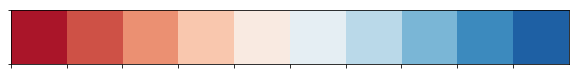

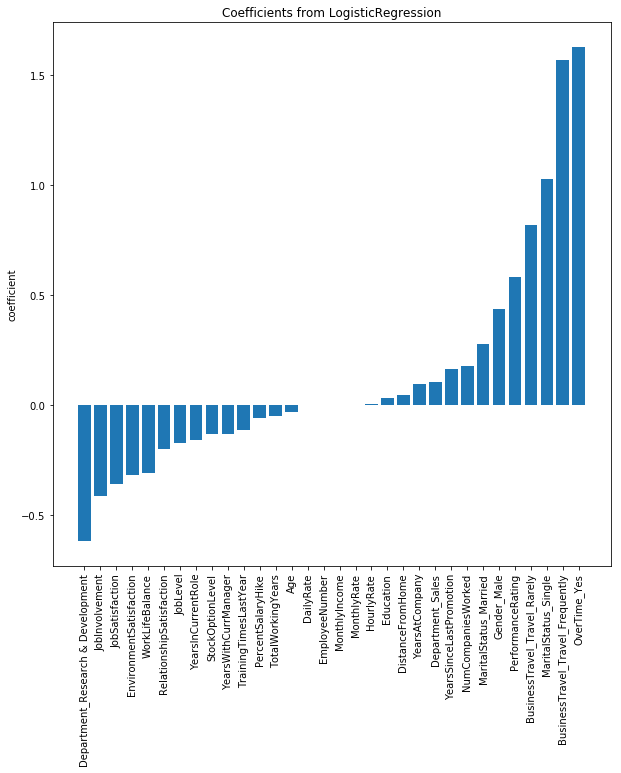

In [43]:
# Sorted plot
xVal = logreg.coef_[0]
yVal = np.arange(len(logreg.coef_[0]))

lists = sorted(zip(*[xVal, yVal]))
newX, newY = list(zip(*lists))

# Plot
plt.figure(figsize=(10,10)) 
plt.bar(yVal, newX)
plt.xticks(yVal, train_dummy.columns[[y for y in newY]], rotation='vertical')
plt.ylabel('coefficient')
plt.title('Coefficients from LogisticRegression')
plt.show()

In [44]:
y_pred = logreg.predict(test_dummy)
print("Accuracy of logistic regression classifier on test set:", logreg.score(test_dummy, target_test_dummy))

Accuracy of logistic regression classifier on test set: 0.891156462585


In [45]:
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_dummy, target_train_dummy, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy:",results.mean())

10-fold cross validation average accuracy: 0.871577574967


In [46]:
from sklearn.metrics import confusion_matrix
logreg_cm = confusion_matrix(target_test_dummy, y_pred)
print("confusion matrix:\n",logreg_cm)

confusion matrix:
 [[241   4]
 [ 28  21]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(target_test_dummy, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       245
          1       0.84      0.43      0.57        49

avg / total       0.89      0.89      0.88       294



### Logistic Regression using statsmodels

In [110]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) # assign chisqprob function

logit_sm = sm.Logit(data['Target'], df_dummy)

# fit the model
result_sm = logit_sm.fit()
result_sm.summary()

Optimization terminated successfully.
         Current function value: 0.306934
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           31
Date:                Wed, 06 Dec 2017   Pseudo R-squ.:                  0.3051
Time:                        13:22:30   Log-Likelihood:                -451.19
converged:                       True   LL-Null:                       -649.29
                                        LLR p-value:                 6.024e-65
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0230      0.013     -1.816      0.069      -0.048       0.002
DailyRate                            -0.0002      0.000     -1.072      0.284      -0.001       0.000
DistanceFromHome                      0.0460      0.010      4.434      0.000       0.026       0.066
Education                             0.0233      0.084      0.278      0.781      -0.141       0.188
EmployeeNumber                     -9.78e-05      0.000     -0.681      0.496      -0.000       0.000
EnvironmentSatisfaction              -0.3741      0.079     -4.746      0.000      -0.529      -0.220
HourlyRate                            0.0028      0.004      0.672      0.501      -0.005       0.011
JobInvolvement                       -0.4878      0.118     -4.125      0.000      -0.720      -0.256
JobLevel                             -0.3112      0.281     -1.106      0.269      -0.862       0.240
JobSatisfaction                      -0.3851      0.077     -4.973      0.000      -0.537      -0.233
MonthlyIncome                     -4.268e-05   6.71e-05     -0.636      0.525      -0.000    8.88e-05
MonthlyRate                        7.657e-06    1.2e-05      0.640      0.522   -1.58e-05    3.11e-05
NumCompaniesWorked                    0.1873      0.037      5.047      0.000       0.115       0.260
PercentSalaryHike                    -0.0577      0.037     -1.569      0.117      -0.130       0.014
PerformanceRating                     0.7844      0.311      2.518      0.012       0.174       1.395
RelationshipSatisfaction             -0.2263      0.079     -2.852      0.004      -0.382      -0.071
StockOptionLevel                     -0.1339      0.147     -0.913      0.361      -0.421       0.154
TotalWorkingYears                    -0.0605      0.028     -2.163      0.031      -0.115      -0.006
TrainingTimesLastYear                -0.1450      0.070     -2.081      0.037      -0.282      -0.008
WorkLifeBalance                      -0.2421      0.115     -2.096      0.036      -0.468      -0.016
YearsAtCompany                        0.0944      0.038      2.498      0.012       0.020       0.169
YearsInCurrentRole                   -0.1474      0.044     -3.354      0.001      -0.234      -0.061
YearsSinceLastPromotion               0.1748      0.041      4.235      0.000       0.094       0.256
YearsWithCurrManager                 -0.1348      0.046     -2.931      0.003      -0.225      -0.045
BusinessTravel_Travel_Frequently      2.1857      0.423      5.162      0.000       1.356       3.016
BusinessTravel_Travel_Rarely          1.3485      0.392      3.438      0.001       0.580       2.117
Department_Research & Development    -0.4145      0.401     -1.033      0.301      -1.201       0.372
Department_Sales                      0.4123      0.417      0.988      0.323      -0.406       1.230
Gender_Male                           0.4925      0.178      2.761      0.006  

In [49]:
# Significant features
sign=['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', \
 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', \
 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', \
 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', \
 'BusinessTravel_Travel_Rarely','Gender_Male','MaritalStatus_Single','OverTime_Yes']
len(sign)

19

#### Investigate these features...

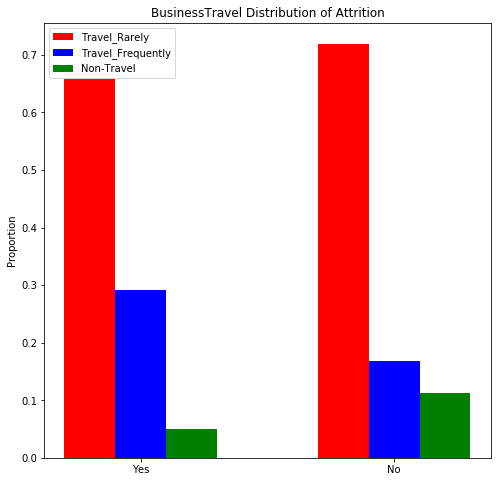

In [50]:
# Predictor: BusinessTravel
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
countTR = [[data.BusinessTravel[i] for i in Yind].count('Travel_Rarely'),[data.BusinessTravel[i] for i in Nind].count('Travel_Rarely')]
countTF = [[data.BusinessTravel[i] for i in Yind].count('Travel_Frequently'),[data.BusinessTravel[i] for i in Nind].count('Travel_Frequently')]
countNT = [[data.BusinessTravel[i] for i in Yind].count('Non-Travel'),[data.BusinessTravel[i] for i in Nind].count('Non-Travel')]
prTR = [countTR[i]/sum([countTR[i]+countTF[i]+countNT[i]]) for i in range(len(countTR))]
prTF = [countTF[i]/sum([countTR[i]+countTF[i]+countNT[i]]) for i in range(len(countTF))]
prNT = [countNT[i]/sum([countTR[i]+countTF[i]+countNT[i]]) for i in range(len(countNT))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width, prTR, width, color='r',align='center')
p2 = plt.bar(xpos, prTF, width, color='b',align='center')
p3 = plt.bar(xpos+width, prNT, width, color='g',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('BusinessTravel Distribution of Attrition')
plt.legend(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],loc='best')
plt.savefig('Attrition_BusinessTravel.png')
plt.show()

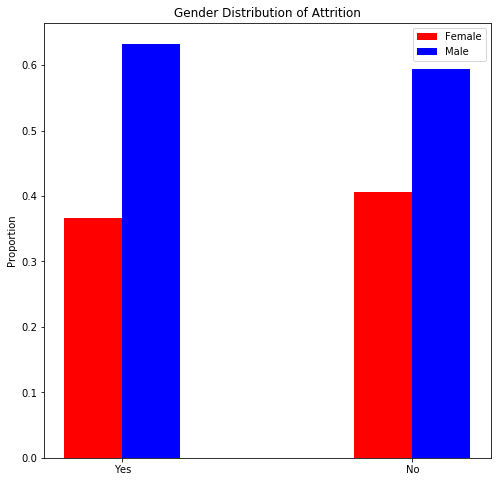

In [51]:
# Predictor: Gender
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
countF = [[data.Gender[i] for i in Yind].count('Female'),[data.Gender[i] for i in Nind].count('Female')]
countM = [[data.Gender[i] for i in Yind].count('Male'),[data.Gender[i] for i in Nind].count('Male')]
prF = [countF[i]/sum([countF[i]+countM[i]]) for i in range(len(countF))]
prM = [countM[i]/sum([countF[i]+countM[i]]) for i in range(len(countM))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width/2, prF, width, color='r',align='center')
p2 = plt.bar(xpos+width/2, prM, width, color='b',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('Gender Distribution of Attrition')
plt.legend(['Female', 'Male'],loc='best')
plt.savefig('Attrition_Gender.png')
plt.show()

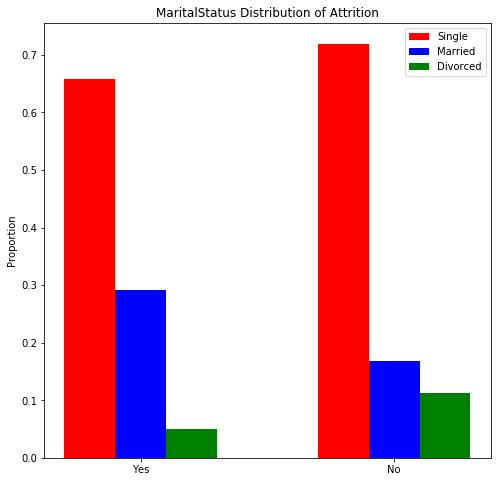

In [52]:
# Predictor: MaritalStatus
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
countS = [[data.MaritalStatus[i] for i in Yind].count('Single'),[data.MaritalStatus[i] for i in Nind].count('Single')]
countM = [[data.MaritalStatus[i] for i in Yind].count('Married'),[data.MaritalStatus[i] for i in Nind].count('Married')]
countD = [[data.MaritalStatus[i] for i in Yind].count('Divorced'),[data.MaritalStatus[i] for i in Nind].count('Divorced')]
prS = [countS[i]/sum([countS[i]+countM[i]+countD[i]]) for i in range(len(countS))]
prM = [countM[i]/sum([countS[i]+countM[i]+countD[i]]) for i in range(len(countM))]
prD = [countD[i]/sum([countS[i]+countM[i]+countD[i]]) for i in range(len(countD))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width, prTR, width, color='r',align='center')
p2 = plt.bar(xpos, prTF, width, color='b',align='center')
p3 = plt.bar(xpos+width, prNT, width, color='g',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('MaritalStatus Distribution of Attrition')
plt.legend(['Single', 'Married', 'Divorced'],loc='best')
plt.savefig('Attrition_MaritalStatus.png')
plt.show()

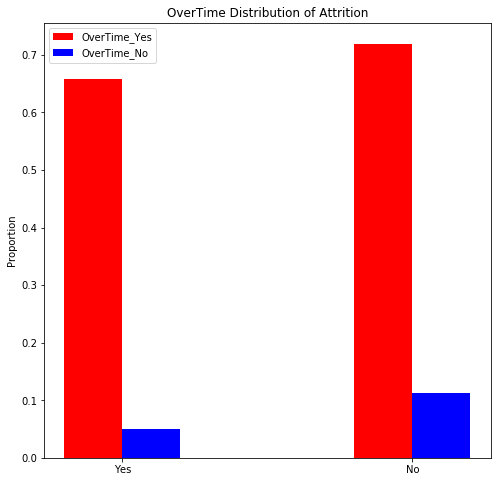

In [53]:
data['OverTime'].unique()

# Predictor: BusinessTravel
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
countY = [[data.OverTime[i] for i in Yind].count('Yes'),[data.OverTime[i] for i in Nind].count('Yes')]
countN = [[data.OverTime[i] for i in Yind].count('No'),[data.OverTime[i] for i in Nind].count('No')]
prY = [countY[i]/sum([countY[i]+countN[i]]) for i in range(len(countY))]
prN = [countN[i]/sum([countY[i]+countN[i]]) for i in range(len(countN))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width/2, prTR, width, color='r',align='center')
p2 = plt.bar(xpos+width/2, prNT, width, color='b',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('OverTime Distribution of Attrition')
plt.legend(['OverTime_Yes', 'OverTime_No'],loc='best')
plt.savefig('Attrition_OverTime.png')
plt.show()

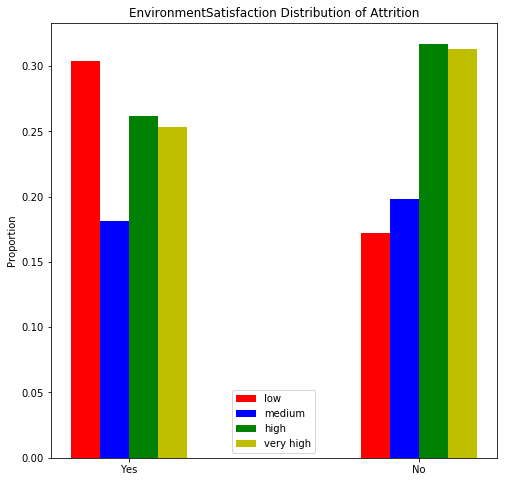

In [54]:
# Predictor: EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.EnvironmentSatisfaction[i] for i in Yind].count(1),[data.EnvironmentSatisfaction[i] for i in Nind].count(1)]
count2 = [[data.EnvironmentSatisfaction[i] for i in Yind].count(2),[data.EnvironmentSatisfaction[i] for i in Nind].count(2)]
count3 = [[data.EnvironmentSatisfaction[i] for i in Yind].count(3),[data.EnvironmentSatisfaction[i] for i in Nind].count(3)]
count4 = [[data.EnvironmentSatisfaction[i] for i in Yind].count(4),[data.EnvironmentSatisfaction[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('EnvironmentSatisfaction Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_EnvironmentSatisfaction.png')
plt.show()

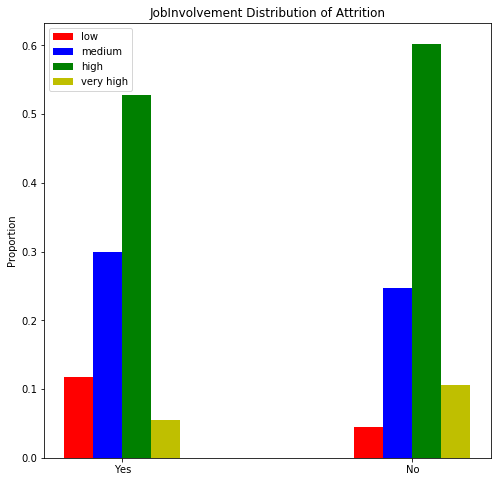

In [55]:
# Predictor: JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.JobInvolvement[i] for i in Yind].count(1),[data.JobInvolvement[i] for i in Nind].count(1)]
count2 = [[data.JobInvolvement[i] for i in Yind].count(2),[data.JobInvolvement[i] for i in Nind].count(2)]
count3 = [[data.JobInvolvement[i] for i in Yind].count(3),[data.JobInvolvement[i] for i in Nind].count(3)]
count4 = [[data.JobInvolvement[i] for i in Yind].count(4),[data.JobInvolvement[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('JobInvolvement Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_JobInvolvement.png')
plt.show()

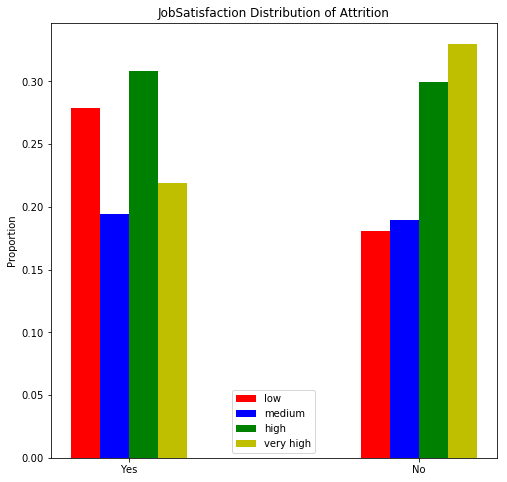

In [56]:
# Predictor: JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.JobSatisfaction[i] for i in Yind].count(1),[data.JobSatisfaction[i] for i in Nind].count(1)]
count2 = [[data.JobSatisfaction[i] for i in Yind].count(2),[data.JobSatisfaction[i] for i in Nind].count(2)]
count3 = [[data.JobSatisfaction[i] for i in Yind].count(3),[data.JobSatisfaction[i] for i in Nind].count(3)]
count4 = [[data.JobSatisfaction[i] for i in Yind].count(4),[data.JobSatisfaction[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('JobSatisfaction Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_JobSatisfaction.png')
plt.show()

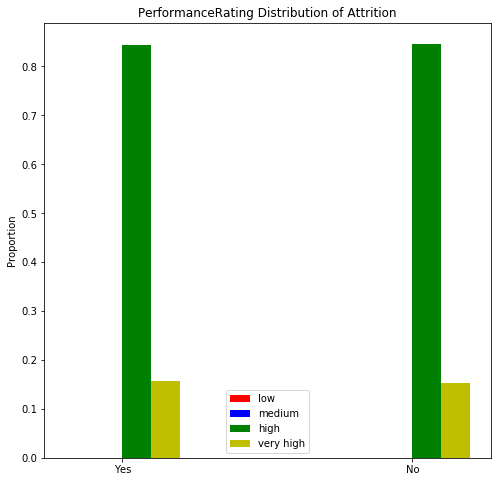

In [57]:
# Predictor: PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.PerformanceRating[i] for i in Yind].count(1),[data.PerformanceRating[i] for i in Nind].count(1)]
count2 = [[data.PerformanceRating[i] for i in Yind].count(2),[data.PerformanceRating[i] for i in Nind].count(2)]
count3 = [[data.PerformanceRating[i] for i in Yind].count(3),[data.PerformanceRating[i] for i in Nind].count(3)]
count4 = [[data.PerformanceRating[i] for i in Yind].count(4),[data.PerformanceRating[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('PerformanceRating Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_PerformanceRating.png')
plt.show()

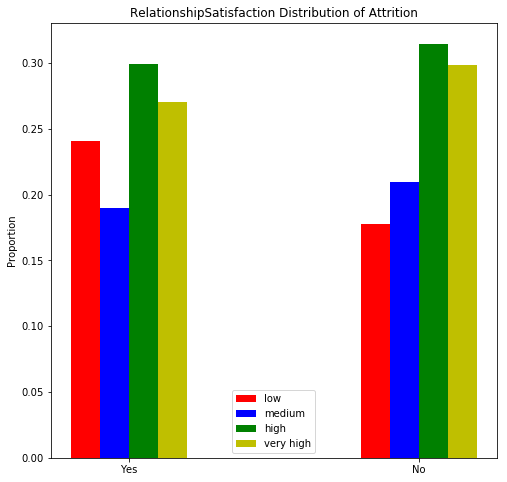

In [58]:
# Predictor: RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.RelationshipSatisfaction[i] for i in Yind].count(1),[data.RelationshipSatisfaction[i] for i in Nind].count(1)]
count2 = [[data.RelationshipSatisfaction[i] for i in Yind].count(2),[data.RelationshipSatisfaction[i] for i in Nind].count(2)]
count3 = [[data.RelationshipSatisfaction[i] for i in Yind].count(3),[data.RelationshipSatisfaction[i] for i in Nind].count(3)]
count4 = [[data.RelationshipSatisfaction[i] for i in Yind].count(4),[data.RelationshipSatisfaction[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('RelationshipSatisfaction Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_RelationshipSatisfaction.png')
plt.show()

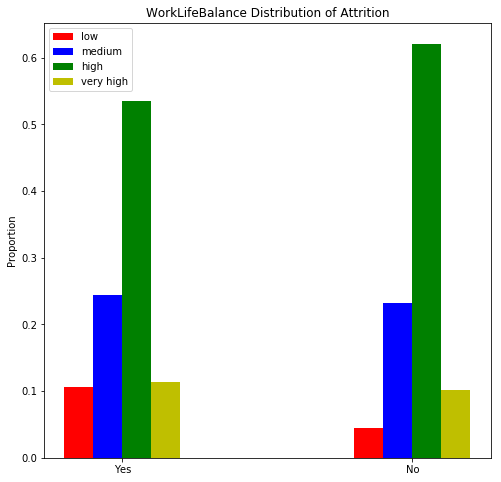

In [59]:
# Predictor: WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
isY = [1 if x=='Yes' else 0 for x in data['Attrition']]
isN = [1 if x=='No' else 0 for x in data['Attrition']]
Yind=[i for i, j in enumerate(isY) if j == 1]
Nind=[i for i, j in enumerate(isN) if j == 1]
mylabel = ['Yes', 'No']
count1 = [[data.WorkLifeBalance[i] for i in Yind].count(1),[data.WorkLifeBalance[i] for i in Nind].count(1)]
count2 = [[data.WorkLifeBalance[i] for i in Yind].count(2),[data.WorkLifeBalance[i] for i in Nind].count(2)]
count3 = [[data.WorkLifeBalance[i] for i in Yind].count(3),[data.WorkLifeBalance[i] for i in Nind].count(3)]
count4 = [[data.WorkLifeBalance[i] for i in Yind].count(4),[data.WorkLifeBalance[i] for i in Nind].count(4)]
pr1 = [count1[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count1))]
pr2 = [count2[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count2))]
pr3 = [count3[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count3))]
pr4 = [count4[i]/sum([count1[i]+count2[i]+count3[i]+count4[i]]) for i in range(len(count4))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.1
p1 = plt.bar(xpos-width*1.5, pr1, width, color='r',align='center')
p2 = plt.bar(xpos-width/2, pr2, width, color='b',align='center')
p3 = plt.bar(xpos+width/2, pr3, width, color='g',align='center')
p4 = plt.bar(xpos+width*1.5, pr4, width, color='y',align='center')

plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('WorkLifeBalance Distribution of Attrition')
plt.legend(['low','medium','high','very high'],loc='best')
plt.savefig('Attrition_WorkLifeBalance.png')
plt.show()

In [60]:
data_sign = data[['DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                  'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager',"Attrition"]]
data_sign.shape

(1470, 9)

In [61]:
data_sign.pivot_table(values='TrainingTimesLastYear', index='Attrition',aggfunc='median')

,TrainingTimesLastYear
Attrition,
No,3
Yes,2


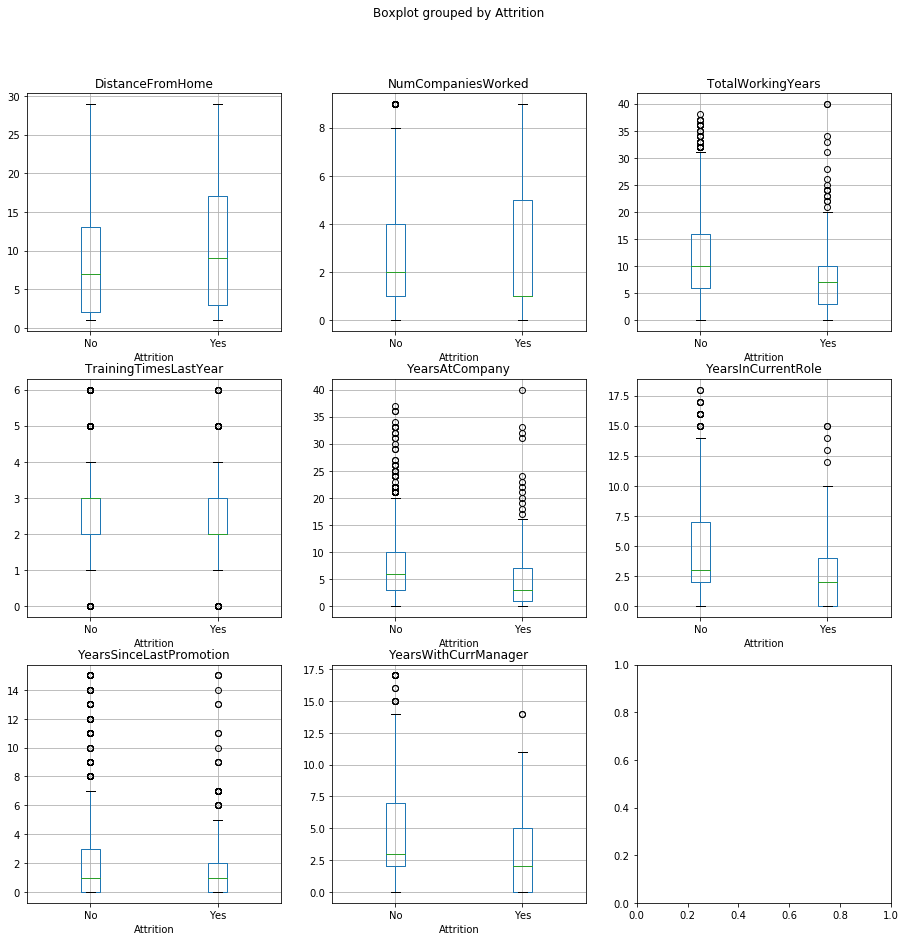

In [108]:
# Create boxplots
import math
fig,axes=plt.subplots(ncols=3,nrows=3,figsize=(15,15))
for i in range(len(data_sign.columns)-1):
    data_sign.boxplot(column=data_sign.columns.values[i], by='Attrition',ax=axes[math.ceil(((i+1)/3)-1),((i+1)%3)-1])
plt.savefig('boxplot_attrition.png')
plt.show()

#### Random Forest

In [63]:
n_params = {'n_estimators':[10,20,30,50],
            'max_depth': [3,5,10,None],
            'min_samples_split':[2,5,10]}
gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=0),n_params,cv= KFold(n_splits=5,shuffle=True))

In [64]:
gsrf.fit(train_dummy,target_train_dummy)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 50], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
gsrf.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

In [66]:
rf1 = RandomForestClassifier(n_jobs=-1,random_state=0,max_depth=10,min_samples_split=5,n_estimators=20)
rf1.fit(train_dummy,target_train_dummy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
rf_predicts = gsrf.predict(test_dummy)
print(classification_report(target_test_dummy,rf_predicts))
print(confusion_matrix(target_test_dummy,rf_predicts))
print("accuracy: ",accuracy_score(target_test_dummy,rf_predicts))
print("auc: ", roc_auc_score(target_test_dummy, rf_predicts))

             precision    recall  f1-score   support

          0       0.85      0.99      0.91       245
          1       0.67      0.12      0.21        49

avg / total       0.82      0.84      0.80       294

[[242   3]
 [ 43   6]]
accuracy:  0.843537414966
auc:  0.555102040816


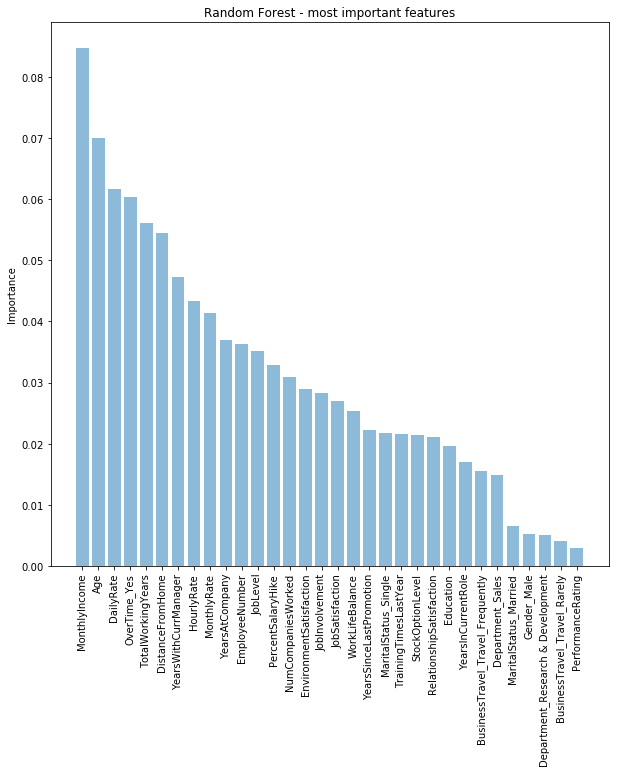

In [68]:
features = train_dummy.columns
feat = list(features)
y_feat = list(rf1.feature_importances_)

featimport_pairs = sorted(zip(feat, y_feat), reverse=True, key=lambda x: x[1])
featimport_pairs = featimport_pairs
a,b = [list(c) for c in zip(*featimport_pairs)]
y_pos = np.arange(len(a))

plt.figure(figsize=(10,10))
plt.bar(y_pos, b, align = 'center', alpha = 0.5)
plt.xticks(y_pos, a, rotation = 'vertical')
plt.ylabel('Importance')
plt.title('Random Forest - most important features')

plt.savefig('RF_Attrition.png')
plt.show()

## Predict Job Satisfaction

Create new DataFrames for this part. The target is now "JobSatisfaction".

In [69]:
data['Target2'] = data[['JobSatisfaction']].values

In [70]:
# JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
# Create a new feature, Target 3. If Target3=1 if JobSatisfaction is 'High' or 'Very High', Target3=0 otherwise.
data['Target3'] = [(data.JobSatisfaction[i]==3 or data.JobSatisfaction[i]==4) for i in range(len(data.JobSatisfaction))]
data['Target3'].unique()

array([ True, False], dtype=bool)

In [71]:
# Drop the target column, Attrition from the dataset
df2 = data.drop(['JobSatisfaction','EmployeeCount','StandardHours',
                'EducationField','JobRole','Over18','Target','Target2','Target3'], axis=1)

# create a list of categorical predictors
categorical_index2 = []
for col, value in df2.iteritems():
    if value.dtype == 'object':
        categorical_index2.append(col)
categorical_index2 = np.asarray(categorical_index2)

# Store the numerical columns in a list numerical
numerical_index2 = df2.columns.difference(categorical_index2).tolist()
numerical_index2 = np.asarray(numerical_index2)

In [72]:
categorical_index2

array(['Attrition', 'BusinessTravel', 'Department', 'Gender',
       'MaritalStatus', 'OverTime'],
      dtype='<U14')

In [73]:
dummies2 = pd.DataFrame(df2[categorical_index2])
dummies2 = pd.get_dummies(dummies2)
df_dummy2 = pd.concat([df2, dummies2], axis=1)
df_dummy2 = df_dummy2.drop(['Attrition','BusinessTravel', 'Department', 'Gender',
                          'MaritalStatus','OverTime','Attrition_No','BusinessTravel_Non-Travel',
                          'Department_Human Resources','Gender_Female',
                          'MaritalStatus_Divorced','OverTime_No'], axis=1)
print("df2 shape:",df2.shape)
print("df_dummy2 shape:",df_dummy2.shape)

df2 shape: (1470, 29)
df_dummy2 shape: (1470, 32)


In [74]:
# Split into training and testing data. Here target is JobSatisfaction with 4 classes
train2, test2, target_train2, target_test2 = train_test_split(df2, data['Target2'], 
                                                              train_size= 0.8,random_state=0)
print("shape train2:",train2.shape)
print("shape test2:",test2.shape)

# Split into training and testing data for data with dummy variables
train_dummy2, test_dummy2, target_train_dummy2, target_test_dummy2 = train_test_split(
    df_dummy2, data.Target2, train_size= 0.8,random_state=0)
print("shape train_dummy2:",train_dummy2.shape)
print("shape test_dummy2:",test_dummy2.shape)

shape train2: (1176, 29)
shape test2: (294, 29)
shape train_dummy2: (1176, 32)
shape test_dummy2: (294, 32)


/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
# Split into training and testing data. Here target is JobSatisfaction with 2 classes
train3, test3, target_train3, target_test3 = train_test_split(df2, data['Target3'], 
                                                              train_size= 0.8,random_state=0)
print("shape train3:",train3.shape)
print("shape test3:",test3.shape)

# Split into training and testing data for data with dummy variables
train_dummy3, test_dummy3, target_train_dummy3, target_test_dummy3 = train_test_split(
    df_dummy2, data.Target3, train_size= 0.8,random_state=0)
print("shape train_dummy3:",train_dummy3.shape)
print("shape test_dummy3:",test_dummy3.shape)

shape train3: (1176, 29)
shape test3: (294, 29)
shape train_dummy3: (1176, 32)
shape test_dummy3: (294, 32)


/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
#df2.to_csv('df2.csv')
#data.to_csv('data.csv')

#### PCA

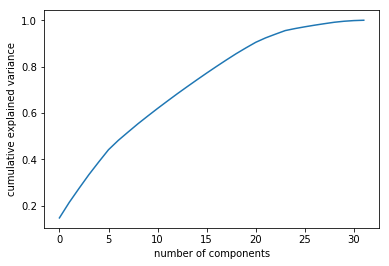

In [77]:
# How many components?
x_std2 = StandardScaler().fit_transform(df_dummy2)
pca2 = PCA().fit(x_std2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [78]:
pipeline2 = Pipeline([('scaling', StandardScaler(with_mean=False)), ('pca', PCA(n_components=10))])
pipeline2.fit_transform(df_dummy2)

pipeline2.named_steps['pca'].explained_variance_ratio_

array([ 0.14813057,  0.06681553,  0.06062413,  0.05890569,  0.05454821,
        0.05296927,  0.04037218,  0.03577606,  0.03541498,  0.03333788])

In [79]:
#### Create Biplot
X2 = df_dummy2
y2 = data.Target3
# Scale data
scaler = StandardScaler().fit(X2)
X2 = scaler.transform(X2) 
pca2 = PCA()
x_new2 = pca2.fit_transform(X2)

In [80]:
print(x_new2[:,0:2].shape)
print(np.transpose(pca2.components_[0:2, :]).shape)
print(len(df_dummy2.columns))

(1470, 2)
(32, 2)
32


In [81]:
# Plot biplot 
# Source: https://stackoverflow.com/questions/39216897/how-to-plot-pca-loadings-and-loading-label-like-rs-autoplot-w-matplotli
def myplot2(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    colors = ['orange','skyblue','yellow','pink']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = [colors[c] for c in y2])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.1, coeff[i,1]*1.1, "Var"+str(i+1), color = 'b', ha = 'center', va = 'center', size=12)
        else:
            plt.text(coeff[i,0]*1.1, coeff[i,1]*1.1, labels[i], color = 'b', ha = 'center', va = 'center', size=12)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

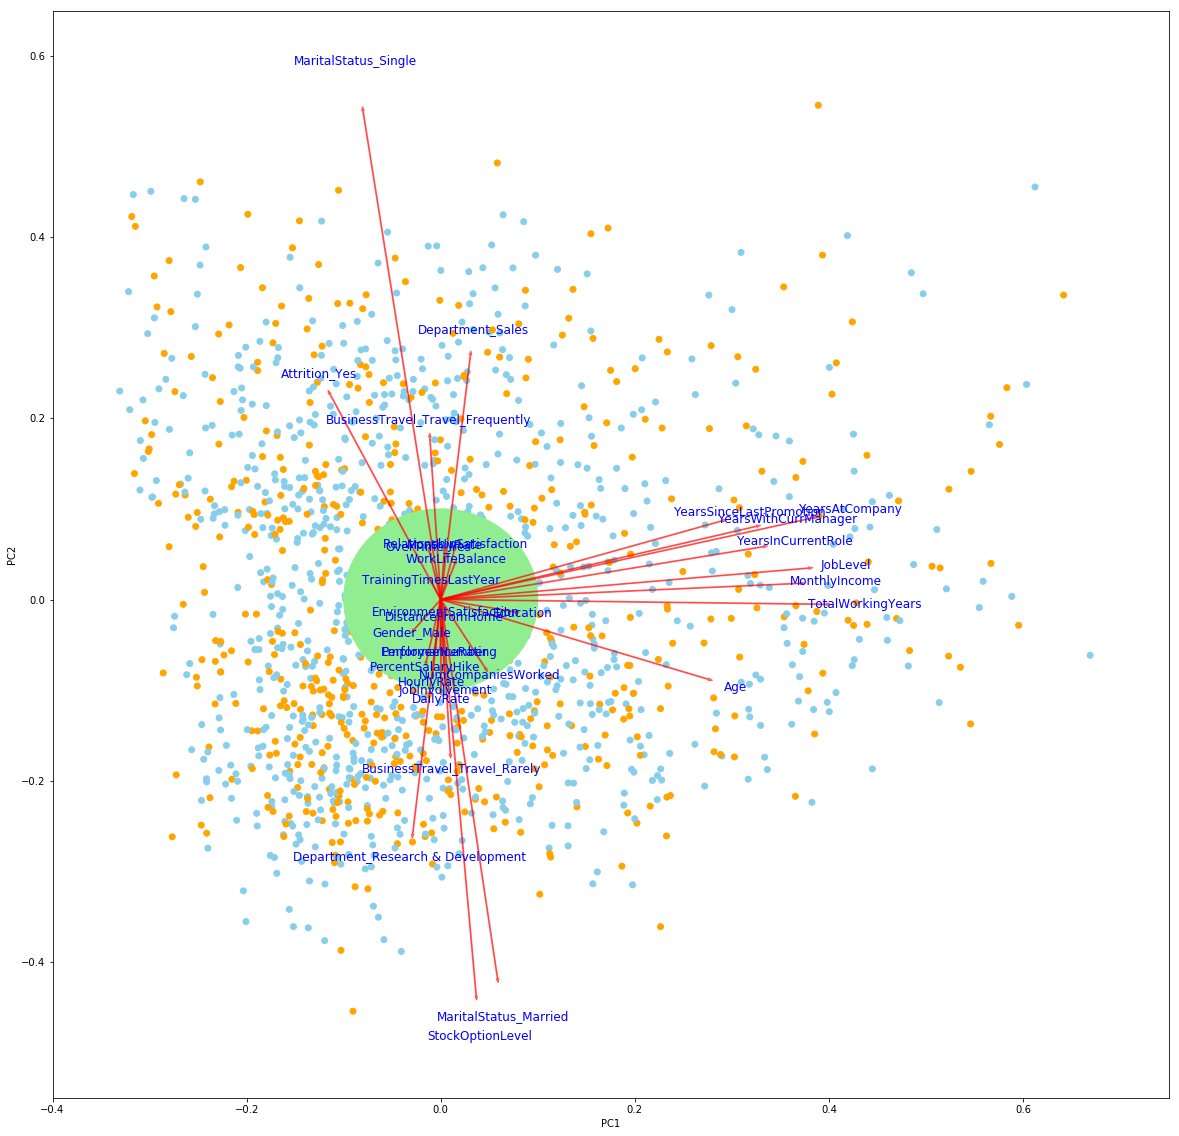

In [82]:
# Use only the 2 PCs.
fig_biplot2 = plt.figure(figsize=(20,20))
ax_biplot2 = fig_biplot2.add_subplot(111)
myplot2(x_new2[:,0:2],np.transpose(pca2.components_[0:2, :]),labels=df_dummy2.columns)
plt.xlim(-.4,.75)
plt.ylim(-.55,.65)
ax_biplot2.add_patch(
    patches.Circle((0, 0),0.1,color='lightgreen')
)
plt.savefig('PCA_JobSatisfaction.png')
plt.show()

The arrow length represents the variance of each variable contributing to the principal conponents. and the angle between arrows represents the corration between variables.

The biplot shows that some variables are in the same direction having similar meaning in the context of the data (similar response).

#### Logistic Regression

In [83]:
logreg2 = LogisticRegression(random_state=0)
logreg2.fit(train_dummy2, target_train_dummy2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

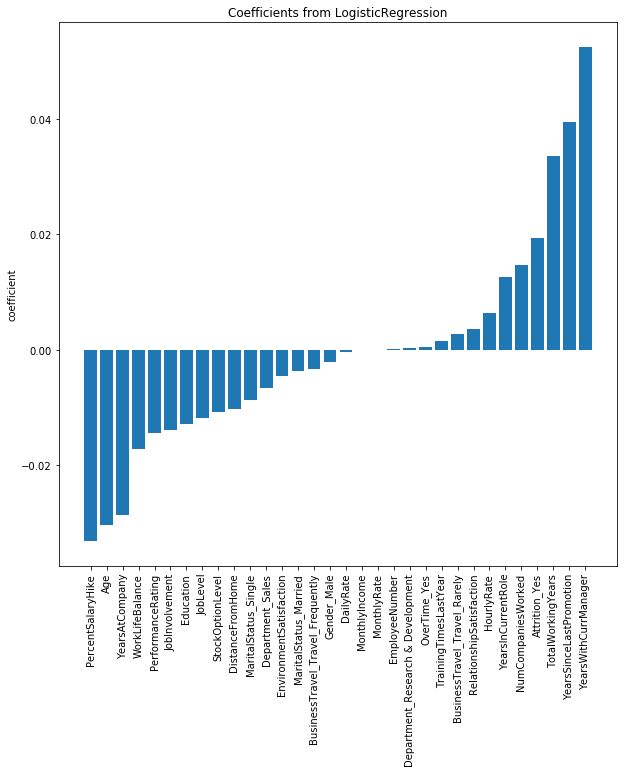

In [84]:
# Sorted plot
xVal2 = logreg2.coef_[0]
yVal2 = np.arange(len(logreg2.coef_[0]))

lists2 = sorted(zip(*[xVal2, yVal2]))
newX2, newY2 = list(zip(*lists2))

# Plot
plt.figure(figsize=(10,10)) 
plt.bar(yVal2, newX2)
plt.xticks(yVal2, train_dummy2.columns[[y for y in newY2]], rotation='vertical')
plt.ylabel('coefficient')
plt.title('Coefficients from LogisticRegression')
plt.show()

In [85]:
y_pred2 = logreg2.predict(test_dummy2)
print("Accuracy of logistic regression classifier on test set:", logreg2.score(test_dummy2, target_test_dummy2))

Accuracy of logistic regression classifier on test set: 0.28231292517


In [86]:
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results2 = model_selection.cross_val_score(modelCV, train_dummy2, target_train_dummy2, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy:",results2.mean())

10-fold cross validation average accuracy: 0.283985223816


In [87]:
logreg_cm2 = confusion_matrix(target_test_dummy2, y_pred2)
print("confusion matrix:\n",logreg_cm2)
print(classification_report(target_test_dummy2, y_pred2))

confusion matrix:
 [[ 2  2 22 35]
 [ 8  0 17 26]
 [ 7  0 39 48]
 [ 9  1 36 42]]
             precision    recall  f1-score   support

          1       0.08      0.03      0.05        61
          2       0.00      0.00      0.00        51
          3       0.34      0.41      0.37        94
          4       0.28      0.48      0.35        88

avg / total       0.21      0.28      0.23       294



Use Target3 as the response

In [88]:
logreg22 = LogisticRegression(random_state=0)
logreg22.fit(train_dummy3, target_train_dummy3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
# Sorted plot
xVal22 = logreg22.coef_[0]
yVal22 = np.arange(len(logreg22.coef_[0]))

lists22 = sorted(zip(*[xVal22, yVal22]))
newX22, newY22 = list(zip(*lists22))

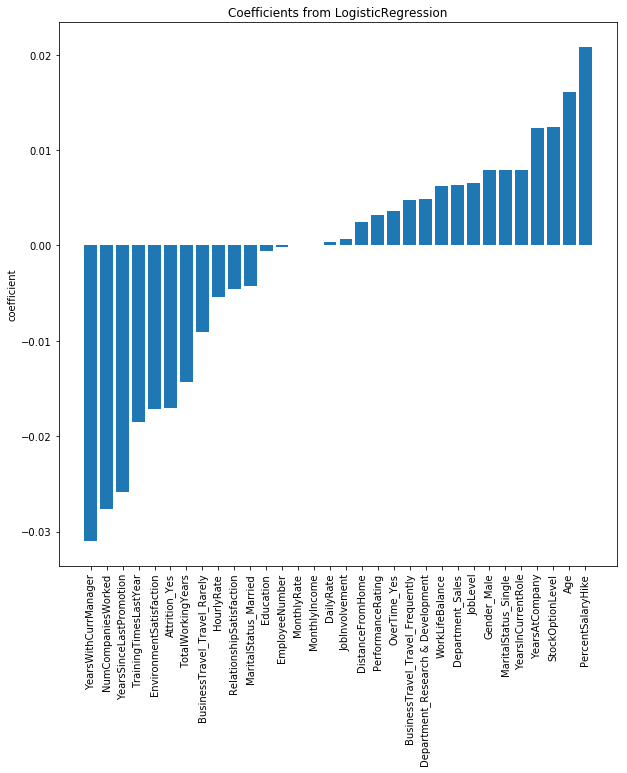

In [90]:
# Plot
plt.figure(figsize=(10,10)) 
plt.bar(yVal22, newX22)
plt.xticks(yVal22, train_dummy3.columns[[y for y in newY22]], rotation='vertical')
plt.ylabel('coefficient')
plt.title('Coefficients from LogisticRegression')
plt.show()

In [91]:
y_pred22 = logreg22.predict(test_dummy3)
print("Accuracy of logistic regression classifier on test set:", logreg22.score(test_dummy3, target_test_dummy3))

Accuracy of logistic regression classifier on test set: 0.605442176871


In [92]:
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results22 = model_selection.cross_val_score(modelCV, train_dummy3, target_train_dummy3, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy:",results22.mean())

logreg_cm22 = confusion_matrix(target_test_dummy3, y_pred22)
print("confusion matrix:\n",logreg_cm22)
print(classification_report(target_test_dummy3, y_pred22))

10-fold cross validation average accuracy: 0.596856439229
confusion matrix:
 [[  7 105]
 [ 11 171]]
             precision    recall  f1-score   support

      False       0.39      0.06      0.11       112
       True       0.62      0.94      0.75       182

avg / total       0.53      0.61      0.50       294



### Logistic Regression using statsmodels

In [93]:
logit_sm2 = sm.Logit(data.Target3, df_dummy2)
# fit the model
result_sm2 = logit_sm2.fit()
result_sm2.summary()

Optimization terminated successfully.
         Current function value: 0.651985
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Target3   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                           31
Date:                Wed, 06 Dec 2017   Pseudo R-squ.:                 0.02313
Time:                        00:21:10   Log-Likelihood:                -958.42
converged:                       True   LL-Null:                       -981.11
                                        LLR p-value:                   0.04606
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                   0.0114      0.008      1.371      0.171      -0.005       0.028
DailyRate                             0.0003      0.000      2.136      0.033    2.38e-05       0.001
DistanceFromHome                      0.0031      0.007      0.454      0.650      -0.010       0.016
Education                             0.0158      0.054      0.290      0.772      -0.091       0.122
EmployeeNumber                       -0.0001    9.1e-05     -1.198      0.231      -0.000    6.94e-05
EnvironmentSatisfaction              -0.0689      0.050     -1.380      0.168      -0.167       0.029
HourlyRate                           -0.0064      0.003     -2.392      0.017      -0.012      -0.001
JobInvolvement                       -0.0495      0.076     -0.656      0.512      -0.198       0.099
JobLevel                              0.1438      0.167      0.859      0.390      -0.184       0.472
MonthlyIncome                      -2.14e-05   3.83e-05     -0.559      0.576   -9.65e-05    5.37e-05
MonthlyRate                        4.581e-06   7.65e-06      0.599      0.549   -1.04e-05    1.96e-05
NumCompaniesWorked                   -0.0319      0.024     -1.312      0.190      -0.080       0.016
PercentSalaryHike                     0.0051      0.023      0.224      0.823      -0.039       0.050
PerformanceRating                     0.0112      0.195      0.058      0.954      -0.370       0.393
RelationshipSatisfaction             -0.0309      0.050     -0.613      0.540      -0.130       0.068
StockOptionLevel                      0.0801      0.088      0.914      0.360      -0.092       0.252
TotalWorkingYears                    -0.0223      0.015     -1.474      0.141      -0.052       0.007
TrainingTimesLastYear                -0.0328      0.042     -0.778      0.437      -0.115       0.050
WorkLifeBalance                      -0.0033      0.075     -0.043      0.966      -0.151       0.144
YearsAtCompany                        0.0182      0.019      0.952      0.341      -0.019       0.056
YearsInCurrentRole                    0.0153      0.025      0.615      0.539      -0.033       0.064
YearsSinceLastPromotion              -0.0105      0.022     -0.477      0.633      -0.053       0.033
YearsWithCurrManager                 -0.0433      0.026     -1.688      0.091      -0.094       0.007
Attrition_Yes                        -0.5894      0.164     -3.587      0.000      -0.911      -0.267
BusinessTravel_Travel_Frequently      0.1084      0.215      0.504      0.615      -0.314       0.530
BusinessTravel_Travel_Rarely         -0.1049      0.183     -0.574      0.566      -0.463       0.253
Department_Research & Development     0.5423      0.256      2.118      0.034       0.040       1.044
Department_Sales                      0.5208      0.269      1.938      0.053      -0.006       1.048
Gender_Male                           0.1736      0.111      1.562      0.118  

In [94]:
df_dummy2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales', 'Gender_Male',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [95]:
# Significant features
sign=['DailyRate','HourlyRate','Attrition_Yes', 'Department_Research & Development']
len(sign)

4

#### Investigate these features...

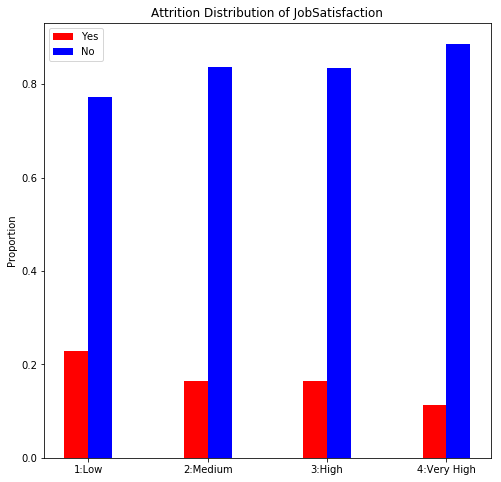

In [96]:
# Predictor: Attrition
is1 = [1 if x==1 else 0 for x in data['JobSatisfaction']]
is2 = [1 if x==2 else 0 for x in data['JobSatisfaction']]
is3 = [1 if x==3 else 0 for x in data['JobSatisfaction']]
is4 = [1 if x==4 else 0 for x in data['JobSatisfaction']]
ind1=[i for i, j in enumerate(is1) if j == 1]
ind2=[i for i, j in enumerate(is2) if j == 1]
ind3=[i for i, j in enumerate(is3) if j == 1]
ind4=[i for i, j in enumerate(is4) if j == 1]
mylabel = ['1:Low','2:Medium','3:High','4:Very High']
countY = [[data.Attrition[i] for i in ind1].count('Yes'),[data.Attrition[i] for i in ind2].count('Yes'),[data.Attrition[i] for i in ind3].count('Yes'),[data.Attrition[i] for i in ind4].count('Yes')]
countN = [[data.Attrition[i] for i in ind1].count('No'),[data.Attrition[i] for i in ind2].count('No'),[data.Attrition[i] for i in ind3].count('No'),[data.Attrition[i] for i in ind4].count('No')]
prY = [countY[i]/sum([countY[i]+countN[i]]) for i in range(len(countY))]
prN = [countN[i]/sum([countY[i]+countN[i]]) for i in range(len(countN))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width/2, prY, width, color='r',align='center')
p3 = plt.bar(xpos+width/2, prN, width, color='b',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('Attrition Distribution of JobSatisfaction')
plt.legend(['Yes', 'No'],loc='best')
plt.savefig('JobSatisfaction_Attrition.png')
plt.show()

In [97]:
job = [str(i) for i in data.JobSatisfaction]
dept = data.Department
data_temp = pd.DataFrame(data={'Job':job,'Dept':dept})
data_temp.pivot_table(index='Dept',columns='Job',aggfunc=len)

Job,1,2,3,4
Dept,,,,
Human Resources,11,20,15,17
Research & Development,192,174,300,295
Sales,86,86,127,147


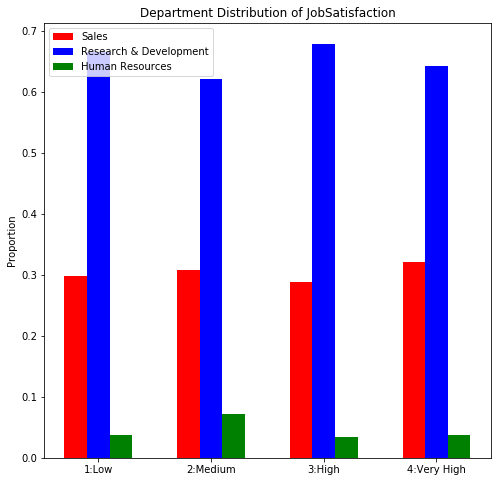

In [107]:
# Predictor: Department 'Sales', 'Research & Development', 'Human Resources'
is1 = [1 if x==1 else 0 for x in data['JobSatisfaction']]
is2 = [1 if x==2 else 0 for x in data['JobSatisfaction']]
is3 = [1 if x==3 else 0 for x in data['JobSatisfaction']]
is4 = [1 if x==4 else 0 for x in data['JobSatisfaction']]
ind1=[i for i, j in enumerate(is1) if j == 1]
ind2=[i for i, j in enumerate(is2) if j == 1]
ind3=[i for i, j in enumerate(is3) if j == 1]
ind4=[i for i, j in enumerate(is4) if j == 1]
mylabel = ['1:Low','2:Medium','3:High','4:Very High']
countS = [[data.Department[i] for i in ind1].count('Sales'),[data.Department[i] for i in ind2].count('Sales'),[data.Department[i] for i in ind3].count('Sales'),[data.Department[i] for i in ind4].count('Sales')]
countRD = [[data.Department[i] for i in ind1].count('Research & Development'),[data.Department[i] for i in ind2].count('Research & Development'),[data.Department[i] for i in ind3].count('Research & Development'),[data.Department[i] for i in ind4].count('Research & Development')]
countHR = [[data.Department[i] for i in ind1].count('Human Resources'),[data.Department[i] for i in ind2].count('Human Resources'),[data.Department[i] for i in ind3].count('Human Resources'),[data.Department[i] for i in ind4].count('Human Resources')]
prS = [countS[i]/sum([countS[i]+countRD[i]+countHR[i]]) for i in range(len(countS))]
prRD = [countRD[i]/sum([countS[i]+countRD[i]+countHR[i]]) for i in range(len(countRD))]
prHR = [countHR[i]/sum([countS[i]+countRD[i]+countHR[i]]) for i in range(len(countHR))]

xpos = np.arange(len(mylabel))
plt.figure(figsize=(8,8))
width=0.2
p1 = plt.bar(xpos-width, prS, width, color='r',align='center')
p2 = plt.bar(xpos, prRD, width, color='b',align='center')
p3 = plt.bar(xpos+width, prHR, width, color='g',align='center')
plt.xticks(xpos, mylabel)
plt.ylabel('Proportion')
plt.title('Department Distribution of JobSatisfaction')
plt.legend(['Sales', 'Research & Development', 'Human Resources'],loc='best')
plt.savefig('JobSatisfaction_Department.png')
plt.show()

In [99]:
data_sign2 = data[['DailyRate','HourlyRate','Target3']]
data_sign2.shape

(1470, 3)

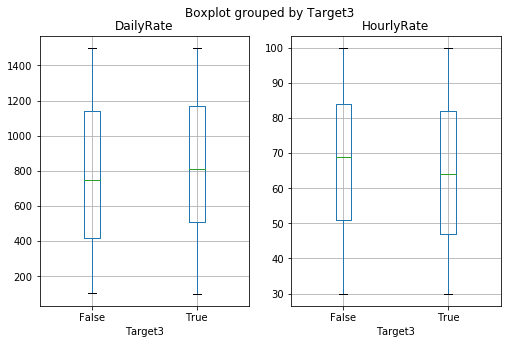

In [100]:
# Create boxplots
fig2,axes2=plt.subplots(ncols=2,nrows=1,figsize=(8,5))
data_sign2.boxplot(column=data_sign2.columns.values[0], by='Target3',ax=axes2[0])
data_sign2.boxplot(column=data_sign2.columns.values[1], by='Target3',ax=axes2[1])
plt.show()

#### Random Forest

In [101]:
n_params2 = {'n_estimators':[10,20,30,50],
            'max_depth': [3,5,10,None],
            'min_samples_split':[2,5,10]}
gsrf2 = GridSearchCV(RandomForestClassifier(),n_params2,cv= KFold(n_splits=5,shuffle=True))

In [102]:
gsrf2.fit(train_dummy2,target_train_dummy2)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 50], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
gsrf2.best_params_

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}

In [104]:
rf2 = RandomForestClassifier(n_jobs=-1,random_state=0,max_depth=3,min_samples_split=10,n_estimators=50)
rf2.fit(train_dummy2,target_train_dummy2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [105]:
rf_predicts2 = gsrf2.predict(test_dummy2)
print(classification_report(target_test_dummy2,rf_predicts2))
print(confusion_matrix(target_test_dummy2,rf_predicts2))
print("accuracy: ",accuracy_score(target_test_dummy2,rf_predicts2))

             precision    recall  f1-score   support

          1       1.00      0.02      0.03        61
          2       0.00      0.00      0.00        51
          3       0.34      0.20      0.25        94
          4       0.30      0.81      0.44        88

avg / total       0.41      0.31      0.22       294

[[ 1  0 10 50]
 [ 0  0 10 41]
 [ 0  0 19 75]
 [ 0  0 17 71]]
accuracy:  0.309523809524


/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


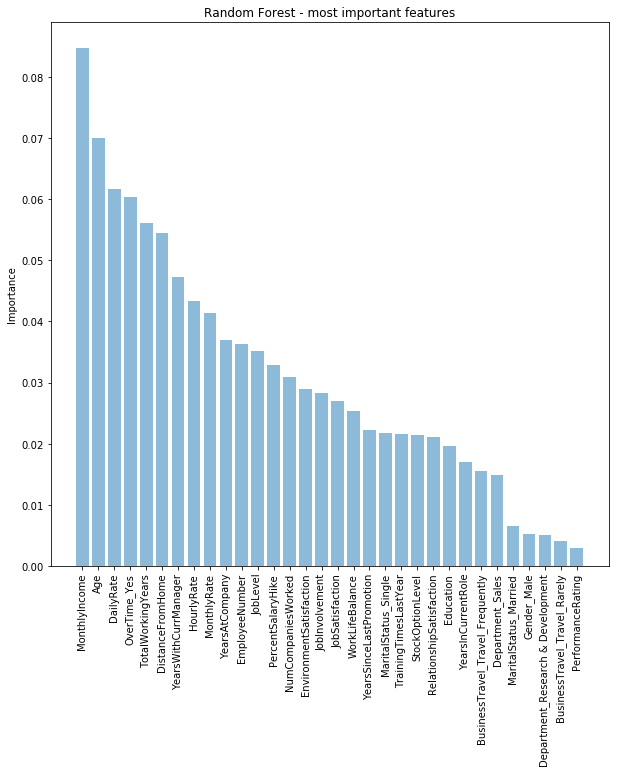

In [109]:
features2 = train_dummy2.columns
feat2 = list(features2)
y_feat2 = list(rf2.feature_importances_)

featimport_pairs = sorted(zip(feat, y_feat), reverse=True, key=lambda x: x[1])
featimport_pairs = featimport_pairs
a,b = [list(c) for c in zip(*featimport_pairs)]
y_pos = np.arange(len(a))

plt.figure(figsize=(10,10))
plt.bar(y_pos, b, align = 'center', alpha = 0.5)
plt.xticks(y_pos, a, rotation = 'vertical')
plt.ylabel('Importance')
plt.title('Random Forest - most important features')
 
plt.savefig('RF_JS')
plt.show()

In [1]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
#dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [11]:

dataset = dataset[['Attrition',
                   'Age',
                   'BusinessTravel',
                   'DailyRate',
                   'Department',
                   'DistanceFromHome',
                   'Education',
                   'EducationField',
                   'EmployeeCount',
                   'EnvironmentSatisfaction',
                   'Gender',
                   'HourlyRate',
                   'JobInvolvement',
                   'JobLevel',
                   'JobRole',
                   'JobSatisfaction',
                   'MaritalStatus',
                   'MonthlyIncome',
                   'MonthlyRate',
                   'NumCompaniesWorked',
                   'OverTime',
                   'PercentSalaryHike',
                   'PerformanceRating',
                   'RelationshipSatisfaction',
                   'StockOptionLevel',
                   'TotalWorkingYears',
                   'TrainingTimesLastYear',
                   'WorkLifeBalance',
                   'YearsAtCompany',
                   'YearsInCurrentRole',
                   'YearsSinceLastPromotion',
                   'YearsWithCurrManager']]

In [13]:
dataset['JobInvolment_On_Salary']= dataset['JobInvolvement'] / dataset['MonthlyIncome'] * 1000
dataset['MarriedAndBad_Worklife_Balance'] = np.where(dataset['MaritalStatus']=='Married', 
                                               dataset['WorkLifeBalance']-2,
                                               dataset['WorkLifeBalance']+1)
dataset['DistanceFromHome_rootedTo_JobSatisfaction'] = dataset['DistanceFromHome']**(1/dataset['JobSatisfaction'])
dataset['TotalJobSatisfaction'] = dataset['EnvironmentSatisfaction'] + dataset['JobSatisfaction'] + dataset['RelationshipSatisfaction'] 
dataset['OldLowEmployeeTendToStay'] = dataset['YearsAtCompany'] / dataset['JobLevel']
dataset['Mothers'] = np.where((dataset['Gender']=='Female') & (dataset['Age']>=36), 1,0)
dataset['Rate'] = dataset['DailyRate'] * 20 + dataset['HourlyRate'] * 8 * 20 + dataset['MonthlyRate']
dataset['RateExtended'] = dataset['Rate'] * (8 - dataset['JobSatisfaction'] - dataset['EnvironmentSatisfaction'])

In [14]:
dataset.groupby('Attrition').count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolment_On_Salary,MarriedAndBad_Worklife_Balance,DistanceFromHome_rootedTo_JobSatisfaction,TotalJobSatisfaction,OldLowEmployeeTendToStay,Mothers,Rate,RateExtended
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [15]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [16]:
col = list(dataset)
col.insert(0, col.pop(col.index('TotalJobSatisfaction')))
dataset_job = dataset.ix[:, col]
dataset_job.head()
dataset_job['TotalJobSatisfaction'] = dataset_job['TotalJobSatisfaction']>=9
dataset_job.groupby('TotalJobSatisfaction').count()

/home/harsh/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolment_On_Salary,MarriedAndBad_Worklife_Balance,DistanceFromHome_rootedTo_JobSatisfaction,OldLowEmployeeTendToStay,Mothers,Rate,RateExtended
TotalJobSatisfaction,,,,,,,,,,,,,,,,,,,,,
False,823,823,823,823,823,823,823,823,823,823,...,823,823,823,823,823,823,823,823,823,823
True,647,647,647,647,647,647,647,647,647,647,...,647,647,647,647,647,647,647,647,647,647


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])
labelencoder_X_6= LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])
labelencoder_X_9= LabelEncoder()
X[:, 9] = labelencoder_X_9.fit_transform(X[:, 9])
labelencoder_X_13= LabelEncoder()
X[:, 13] = labelencoder_X_13.fit_transform(X[:, 13])
labelencoder_X_15= LabelEncoder()
X[:, 15] = labelencoder_X_15.fit_transform(X[:, 15])
labelencoder_X_19= LabelEncoder()
X[:, 19] = labelencoder_X_19.fit_transform(X[:, 19])
X = X.astype(float)
labelencoder_y= LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [18]:
onehotencoder1 = OneHotEncoder(categorical_features = [1])
X = onehotencoder1.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder3 = OneHotEncoder(categorical_features = [4])
X = onehotencoder3.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder6 = OneHotEncoder(categorical_features = [8])
X = onehotencoder6.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder13 = OneHotEncoder(categorical_features = [19])
X = onehotencoder13.fit_transform(X).toarray()
X = X[:,1:]
onehotencoder15 = OneHotEncoder(categorical_features = [28])
X = onehotencoder15.fit_transform(X).toarray()
X = X[:,1:]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [31]:
dropout = 0.4
epochs = 200
batch_size = 8
optimizer = 'adam'
np.random.seed = 7

In [32]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'relu', input_shape = (X.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(8, kernel_initializer="truncated_normal", activation = 'relu'))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(4, kernel_initializer="truncated_normal", activation = 'relu'))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = build_classifier()
history = classifier.fit(X_train,y_train,validation_data= (X_test,y_test),batch_size=batch_size, epochs=epochs,verbose=2)

score = classifier.evaluate(X_test, y_test, batch_size=32)
#classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
#accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 5, verbose=1)
#acc_avg = sum(accuracies)/len(accuracies)
#acc_max = accuracies.max()

Train on 1176 samples, validate on 294 samples
Epoch 1/200
1s - loss: 0.6371 - acc: 0.8257 - val_loss: 0.4856 - val_acc: 0.8741
Epoch 2/200
0s - loss: 0.4615 - acc: 0.8299 - val_loss: 0.3375 - val_acc: 0.8741
Epoch 3/200
0s - loss: 0.4377 - acc: 0.8299 - val_loss: 0.3148 - val_acc: 0.8741
Epoch 4/200
1s - loss: 0.4180 - acc: 0.8299 - val_loss: 0.3070 - val_acc: 0.8741
Epoch 5/200
0s - loss: 0.4241 - acc: 0.8299 - val_loss: 0.2972 - val_acc: 0.8741
Epoch 6/200
0s - loss: 0.3832 - acc: 0.8299 - val_loss: 0.2856 - val_acc: 0.8741
Epoch 7/200
0s - loss: 0.4060 - acc: 0.8299 - val_loss: 0.2851 - val_acc: 0.8741
Epoch 8/200
0s - loss: 0.4059 - acc: 0.8299 - val_loss: 0.2899 - val_acc: 0.8741
Epoch 9/200
0s - loss: 0.3818 - acc: 0.8299 - val_loss: 0.2852 - val_acc: 0.8741
Epoch 10/200
0s - loss: 0.3984 - acc: 0.8299 - val_loss: 0.2927 - val_acc: 0.8741
Epoch 11/200
0s - loss: 0.3861 - acc: 0.8299 - val_loss: 0.2891 - val_acc: 0.8741
Epoch 12/200
0s - loss: 0.3710 - acc: 0.8299 - val_loss: 0.2

1s - loss: 0.2768 - acc: 0.8299 - val_loss: 0.5474 - val_acc: 0.8741
Epoch 102/200
1s - loss: 0.2677 - acc: 0.8299 - val_loss: 0.5361 - val_acc: 0.8741
Epoch 103/200
0s - loss: 0.2439 - acc: 0.8299 - val_loss: 0.5816 - val_acc: 0.8741
Epoch 104/200
0s - loss: 0.2579 - acc: 0.8299 - val_loss: 0.5360 - val_acc: 0.8741
Epoch 105/200
0s - loss: 0.2607 - acc: 0.8257 - val_loss: 0.5432 - val_acc: 0.8741
Epoch 106/200
0s - loss: 0.2410 - acc: 0.8299 - val_loss: 0.6040 - val_acc: 0.8741
Epoch 107/200
0s - loss: 0.2506 - acc: 0.8367 - val_loss: 0.6090 - val_acc: 0.8639
Epoch 108/200
0s - loss: 0.2492 - acc: 0.8520 - val_loss: 0.6513 - val_acc: 0.8605
Epoch 109/200
0s - loss: 0.2587 - acc: 0.8563 - val_loss: 0.5945 - val_acc: 0.8537
Epoch 110/200
0s - loss: 0.2438 - acc: 0.8631 - val_loss: 0.6253 - val_acc: 0.8537
Epoch 111/200
0s - loss: 0.2481 - acc: 0.8605 - val_loss: 0.6216 - val_acc: 0.8469
Epoch 112/200
0s - loss: 0.2584 - acc: 0.8376 - val_loss: 0.6406 - val_acc: 0.8469
Epoch 113/200
0s -

0s - loss: 0.2365 - acc: 0.8716 - val_loss: 1.0284 - val_acc: 0.8469
 32/294 [==>...........................] - ETA: 0s

In [33]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
pred = classifier.predict_classes(X_test,verbose=1)
array = cm(y_test,pred)
print('\n',cm(y_test,pred))
print(cr(y_test,pred))

 32/294 [==>...........................] - ETA: 1s
 [[233  24]
 [ 21  16]]
             precision    recall  f1-score   support

          0       0.92      0.91      0.91       257
          1       0.40      0.43      0.42        37

avg / total       0.85      0.85      0.85       294



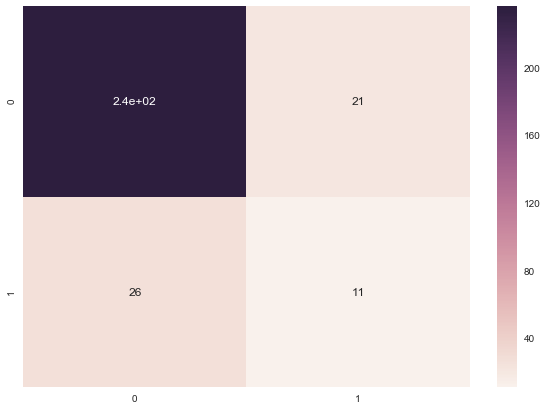

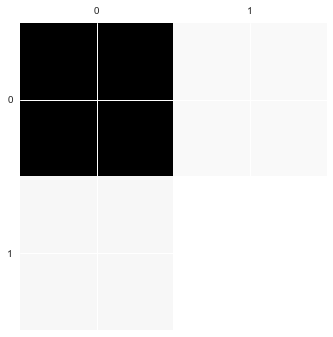

In [26]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(array, annot=True)
plt.matshow(array)
plt.show()

Best accuracy:  84.0136054422


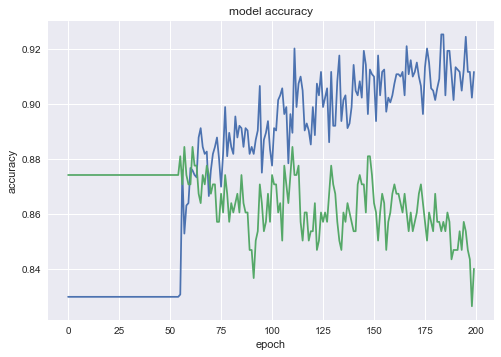

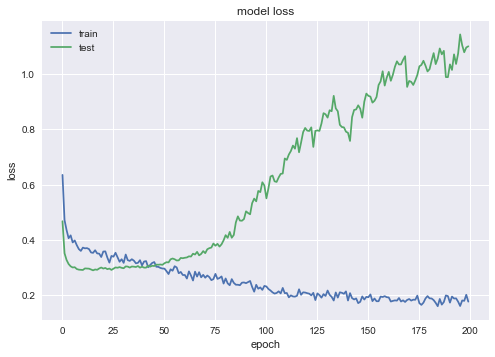

In [27]:
import matplotlib.pyplot as plt
print("Best accuracy: ",score[1]*100)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("attrition.csv")
data.shape


(1470, 35)

In [7]:
df = data.drop(['Attrition','EducationField','JobRole','Over18'], axis=1)

categorical_index = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical_index.append(col)
categorical_index = np.asarray(categorical_index)

# Store the numerical columns in a list numerical
numerical_index = df.columns.difference(categorical_index).tolist()
numerical_index = np.asarray(numerical_index)

In [8]:
df_num = data[numerical_index]
df_cat = data[categorical_index]
df_num.shape

(1470, 26)

In [9]:
dummies = pd.DataFrame(df[['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime']])
dummies = pd.get_dummies(dummies)
df_dummy = pd.concat([df, dummies], axis=1)
df_dummy = df_dummy.drop(['BusinessTravel', 'Department', 'Gender',
                          'MaritalStatus','OverTime', 'BusinessTravel_Non-Travel',
                          'Department_Human Resources','Gender_Female',
                          'MaritalStatus_Divorced','OverTime_No'], axis=1)
print("df shape:",df.shape)
print("df_dummy shape:",df_dummy.shape)

df shape: (1470, 31)
df_dummy shape: (1470, 34)


In [10]:
data['Target'] = [1 if y=='Yes' else 0 for y in data[['Attrition']].values]

In [11]:
from sklearn.cross_validation import train_test_split

train, test, target_train, target_test = train_test_split(df, data['Target'], 
                                                         train_size= 0.8,random_state=0)
print("shape train:",train.shape)
print("shape test:",test.shape)

shape train: (1176, 31)
shape test: (294, 31)


/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
train_dummy, test_dummy, target_train_dummy, target_test_dummy = train_test_split(
    df_dummy, data['Target'], train_size= 0.8,random_state=0)
print("shape train:",train_dummy.shape)
print("shape test:",test_dummy.shape)

shape train: (1176, 34)
shape test: (294, 34)


/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy Score of QDA 0.775510204082


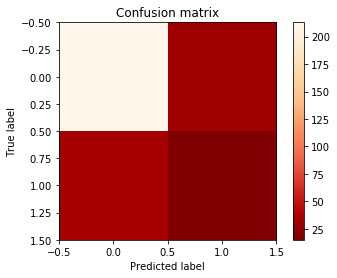

             precision    recall  f1-score   support

          0       0.86      0.87      0.87       245
          1       0.32      0.31      0.31        49

avg / total       0.77      0.78      0.77       294



In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf = QuadraticDiscriminantAnalysis()
clf.fit(train_dummy,target_train)
pred = clf.predict(test_dummy)
print("Accuracy Score of QDA",accuracy_score(target_test_dummy,pred))
cm = confusion_matrix(target_test_dummy,pred)
plt.imshow(cm,cmap=plt.cm.OrRd_r)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
report_qda = classification_report(target_test_dummy,pred)
print(report_qda)

/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy Score of LDA 0.880952380952


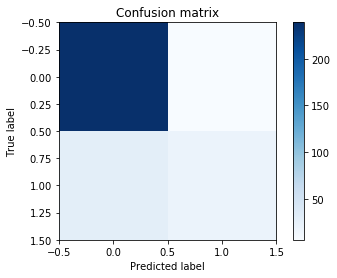

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       245
          1       0.77      0.41      0.53        49

avg / total       0.87      0.88      0.87       294



In [32]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
clf = LinearDiscriminantAnalysis()
clf.fit(train_dummy,target_train)
pred = clf.predict(test_dummy)
print("Accuracy Score of LDA",accuracy_score(target_test_dummy,pred))
cm = confusion_matrix(target_test_dummy,pred)
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
report = classification_report(target_test_dummy,pred)
print(report)

Accuracy of KNN 0.833333333333


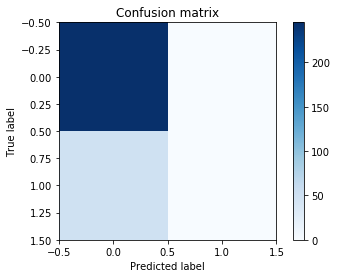

             precision    recall  f1-score   support

          0       0.83      1.00      0.91       245
          1       0.00      0.00      0.00        49

avg / total       0.69      0.83      0.76       294



/home/krushika/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# KNN For Problem 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
clf_knn = KNeighborsClassifier(n_neighbors = 10)
fit = clf_knn.fit(train_dummy,target_train)
pred_knn = clf_knn.predict(test_dummy)
acc = accuracy_score(target_test,pred_knn)
print("Accuracy of KNN",acc)
cm = confusion_matrix(target_test_dummy,pred_knn)

plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(target_test_dummy,pred_knn))

In [20]:
#Trying for multiple K values
from sklearn.metrics import accuracy_score
value_k = [5,10,50,100,200]
predicted_clf_KNN1=[KNeighborsClassifier(n_neighbors=i, weights='uniform').fit(train_dummy,target_train).predict(test_dummy) for i in value_k]
accuracy_knn=[accuracy_score(predicted_clf_KNN1[i],target_test) for i in range(5)]

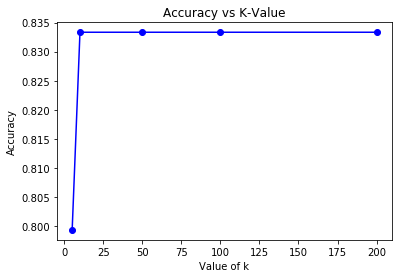

In [26]:
accuracy_knn
plt.title('Accuracy vs K-Value')
plt.plot([5,10,50,100,200], accuracy_knn, 'bo-', label = "accuracy_knn")
plt.ylabel("Accuracy")
plt.xlabel("Value of k")
plt.show()